In [3]:
from fastai.tabular import *
import pandas as pd
from tqdm import tqdm

# Data preparation

In [4]:
TARGET_COLUMN_NAME = 'close'
DATE_COLUMN_NAME = 'date'

## Get the data

In [5]:
from datetime import datetime
df = pd.read_csv("BTC-ETH-filtered_with_indicators.csv",
                 #read dates as dates
                 parse_dates=[DATE_COLUMN_NAME], date_parser=lambda x: datetime.fromtimestamp(int(x)))

In [6]:
df.head()

,date,open,high,low,close,volume,fake,volatility_atr,volatility_bbh,volatility_bbl,...,volume_nvi,momentum_rsi,momentum_mfi,momentum_tsi,momentum_uo,momentum_stoch,momentum_stoch_signal,momentum_wr,momentum_ao,momentum_kama
0,2019-10-08 13:00:00,0.022053,0.022053,0.021884,0.021896,305.268381,0,0.000128,0.022258,0.021808,...,1000.167981,45.157443,28.591248,35.263099,50.670902,3.022479,35.313687,-96.977521,0.000107,0.021977
1,2019-10-08 14:00:00,0.021882,0.021907,0.021803,0.021864,136.451949,0,0.000126,0.022256,0.021811,...,998.683014,43.532803,29.578064,33.326024,50.240787,12.782255,19.826985,-87.217745,0.000059,0.021955
2,2019-10-08 15:00:00,0.021853,0.021882,0.021817,0.021867,288.438229,0,0.000122,0.022261,0.021801,...,998.683014,43.717932,20.524735,31.591883,47.917554,13.526088,9.776940,-86.473912,0.000008,0.021939
3,2019-10-08 16:00:00,0.021874,0.021967,0.021828,0.021929,92.436833,0,0.000123,0.022252,0.021820,...,1001.537481,47.884700,25.320718,30.209204,49.308124,34.472678,20.260340,-65.527322,-0.000037,0.021939
4,2019-10-08 17:00:00,0.021909,0.021938,0.021862,0.021937,69.129320,0,0.000120,0.022247,0.021831,...,1001.911531,48.423552,30.578143,28.984263,55.993278,36.710383,28.236383,-63.289617,-0.000065,0.021939


## Format the data

In [7]:
ELAPSED = 'Elapsed'

In [8]:
add_datepart(df, DATE_COLUMN_NAME, time=True);
df.head()

,open,high,low,close,volume,fake,volatility_atr,volatility_bbh,volatility_bbl,volatility_bbm,...,Is_month_end,Is_month_start,Is_quarter_end,Is_quarter_start,Is_year_end,Is_year_start,Hour,Minute,Second,Elapsed
0,0.022053,0.022053,0.021884,0.021896,305.268381,0,0.000128,0.022258,0.021808,0.022033,...,False,False,False,False,False,False,13,0,0,1570539600
1,0.021882,0.021907,0.021803,0.021864,136.451949,0,0.000126,0.022256,0.021811,0.022034,...,False,False,False,False,False,False,14,0,0,1570543200
2,0.021853,0.021882,0.021817,0.021867,288.438229,0,0.000122,0.022261,0.021801,0.022031,...,False,False,False,False,False,False,15,0,0,1570546800
3,0.021874,0.021967,0.021828,0.021929,92.436833,0,0.000123,0.022252,0.021820,0.022036,...,False,False,False,False,False,False,16,0,0,1570550400
4,0.021909,0.021938,0.021862,0.021937,69.129320,0,0.000120,0.022247,0.021831,0.022039,...,False,False,False,False,False,False,17,0,0,1570554000


### Convert to float

In [9]:
df = df.astype(float)
df.head()

,open,high,low,close,volume,fake,volatility_atr,volatility_bbh,volatility_bbl,volatility_bbm,...,Is_month_end,Is_month_start,Is_quarter_end,Is_quarter_start,Is_year_end,Is_year_start,Hour,Minute,Second,Elapsed
0,0.022053,0.022053,0.021884,0.021896,305.268381,0.0,0.000128,0.022258,0.021808,0.022033,...,0.0,0.0,0.0,0.0,0.0,0.0,13.0,0.0,0.0,1.570540e+09
1,0.021882,0.021907,0.021803,0.021864,136.451949,0.0,0.000126,0.022256,0.021811,0.022034,...,0.0,0.0,0.0,0.0,0.0,0.0,14.0,0.0,0.0,1.570543e+09
2,0.021853,0.021882,0.021817,0.021867,288.438229,0.0,0.000122,0.022261,0.021801,0.022031,...,0.0,0.0,0.0,0.0,0.0,0.0,15.0,0.0,0.0,1.570547e+09
3,0.021874,0.021967,0.021828,0.021929,92.436833,0.0,0.000123,0.022252,0.021820,0.022036,...,0.0,0.0,0.0,0.0,0.0,0.0,16.0,0.0,0.0,1.570550e+09
4,0.021909,0.021938,0.021862,0.021937,69.129320,0.0,0.000120,0.022247,0.021831,0.022039,...,0.0,0.0,0.0,0.0,0.0,0.0,17.0,0.0,0.0,1.570554e+09


### Check for NANs

In [10]:
[(column, sum(df[column].isna())) for column in df.columns]

[('open', 0),
 ('high', 0),
 ('low', 0),
 ('close', 0),
 ('volume', 0),
 ('fake', 0),
 ('volatility_atr', 0),
 ('volatility_bbh', 0),
 ('volatility_bbl', 0),
 ('volatility_bbm', 0),
 ('volatility_kcc', 0),
 ('volatility_kch', 0),
 ('volatility_kcl', 0),
 ('volatility_dch', 0),
 ('volatility_dcl', 0),
 ('trend_macd', 0),
 ('trend_macd_signal', 0),
 ('trend_macd_diff', 0),
 ('trend_ema_fast', 0),
 ('trend_ema_slow', 0),
 ('trend_adx', 0),
 ('trend_adx_pos', 0),
 ('trend_adx_neg', 0),
 ('trend_vortex_ind_pos', 0),
 ('trend_vortex_ind_neg', 0),
 ('trend_vortex_diff', 0),
 ('trend_trix', 0),
 ('trend_mass_index', 0),
 ('trend_cci', 0),
 ('trend_dpo', 0),
 ('trend_kst', 0),
 ('trend_kst_sig', 0),
 ('trend_kst_diff', 0),
 ('trend_ichimoku_a', 0),
 ('trend_ichimoku_b', 0),
 ('trend_visual_ichimoku_a', 0),
 ('trend_visual_ichimoku_b', 0),
 ('trend_aroon_up', 0),
 ('trend_aroon_down', 0),
 ('trend_aroon_ind', 0),
 ('others_dr', 0),
 ('others_dlr', 0),
 ('others_cr', 0),
 ('volume_adi', 0),
 ('vo

In [11]:
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

In [12]:
df.describe(include="all")

,open,high,low,close,volume,fake,volatility_atr,volatility_bbh,volatility_bbl,volatility_bbm,volatility_kcc,volatility_kch,volatility_kcl,volatility_dch,volatility_dcl,trend_macd,trend_macd_signal,trend_macd_diff,trend_ema_fast,trend_ema_slow,trend_adx,trend_adx_pos,trend_adx_neg,trend_vortex_ind_pos,trend_vortex_ind_neg,trend_vortex_diff,trend_trix,trend_mass_index,trend_cci,trend_dpo,trend_kst,trend_kst_sig,trend_kst_diff,trend_ichimoku_a,trend_ichimoku_b,trend_visual_ichimoku_a,trend_visual_ichimoku_b,trend_aroon_up,trend_aroon_down,trend_aroon_ind,others_dr,others_dlr,others_cr,volume_adi,volume_cmf,volume_fi,volume_em,volume_vpt,volume_nvi,momentum_rsi,momentum_mfi,momentum_tsi,momentum_uo,momentum_stoch,momentum_stoch_signal,momentum_wr,momentum_ao,momentum_kama,Year,Month,Week,Day,Dayofweek,Dayofyear,Is_month_end,Is_month_start,Is_quarter_end,Is_quarter_start,Is_year_end,Is_year_start,Hour,Minute,Second,Elapsed
count,1397.000000,1397.000000,1397.000000,1397.000000,1397.000000,1397.000000,1397.000000,1397.000000,1397.000000,1397.000000,1397.000000,1397.000000,1397.000000,1397.000000,1397.000000,1397.000000,1397.000000,1.397000e+03,1397.000000,1397.000000,1397.000000,1397.000000,1397.000000,1397.000000,1397.000000,1397.000000,1397.000000,1397.000000,1397.000000,1397.000000,1397.000000,1397.000000,1397.000000,1397.000000,1397.000000,1397.000000,1397.000000,1397.000000,1397.000000,1397.000000,1397.000000,1397.000000,1397.000000,1397.000000,1397.000000,1.397000e+03,1.397000e+03,1397.000000,1397.000000,1397.000000,1397.000000,1397.000000,1397.000000,1397.000000,1397.000000,1397.000000,1397.000000,1397.000000,1397.0,1397.000000,1397.000000,1397.000000,1397.000000,1397.000000,1397.000000,1397.000000,1397.0,1397.0,1397.0,1397.0,1397.000000,1397.0,1397.0,1.397000e+03
mean,0.020915,0.020967,0.020861,0.020913,153.582367,0.000716,0.000108,0.021151,0.020703,0.020927,0.020920,0.021026,0.020814,0.021123,0.020733,-0.000010,-0.000009,-3.143768e-07,0.020921,0.020931,25.396275,22.898628,23.799541,0.984188,0.983161,0.238856,-0.006324,24.886794,-6.363178,0.000003,-1.256486,-1.181221,-0.075265,0.020920,0.020938,0.020956,0.020972,48.873300,53.821045,-4.947745,-0.005730,-0.006579,-2.627734,-11.823537,-0.032794,-3.332348e-03,1.156144e-12,-0.421218,985.260125,49.718009,48.920859,-0.126826,49.245812,50.283767,50.248067,-49.716233,-0.000021,0.020929,2019.0,10.678597,44.882606,16.190408,2.967072,310.145311,0.034359,0.034359,0.0,0.0,0.0,0.0,11.512527,0.0,0.0,1.573052e+09
std,0.000830,0.000828,0.000835,0.000830,243.568117,0.026755,0.000042,0.000824,0.000852,0.000820,0.000825,0.000820,0.000833,0.000813,0.000840,0.000086,0.000082,2.547605e-05,0.000820,0.000809,10.916563,7.871240,8.386831,0.155383,0.156645,0.182983,0.058278,1.521083,108.646523,0.000106,13.867574,13.621176,4.208580,0.000817,0.000794,0.000817,0.000791,33.245533,33.161315,56.048953,0.411266,0.412725,3.864709,232.269055,0.184855,1.421062e-01,2.333458e-11,8.259312,12.732075,10.589298,19.069128,12.984373,9.663123,26.495306,24.048273,26.495306,0.000219,0.000814,0.0,0.617724,2.426682,8.782934,1.974494,16.813308,0.182216,0.182216,0.0,0.0,0.0,0.0,6.915942,0.0,0.0,1.452325e+06
min,0.019134,0.019194,0.018897,0.019100,0.193810,0.000000,0.000055,0.019485,0.018684,0.019273,0.019240,0.019377,0.019050,0.019511,0.019100,-0.000557,-0.000487,-2.089936e-04,0.019228,0.019334,8.727206,3.854257,3.855724,0.487343,0.484985,0.000226,-0.346318,20.647260,-527.587876,-0.000763,-87.475404,-83.160174,-27.189257,0.019250,0.019377,0.019250,0.019377,4.000000,4.000000,-96.000000,-5.207317,-5.347796,-11.069812,-1989.105675,-0.553080,-4.463384e+00,-8.092963e-11,-202.584464,951.986120,14.324958,3.156019,-34.305654,14.073463,0.000000,0.378128,-100.000000,-0.001671,0.019412,2019.0,10.000000,41.000000,1.000000,0.000000,281.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,1.570540e+09
25%,0.020229,0.020268,0.020182,0.020228,49.003941,0.000000,0.000079,0.020442,0.020009,0.020255,0.020241,0.020334,0.020149,0.020437,0.02007

In [13]:
drop_columns=['Second', 'Month', 'Year', \
              'Is_quarter_end', 'Is_quarter_start', \
              'Is_year_end', 'Is_year_start',
              'Is_month_end', 'Is_month_start',
              'Week', 'Dayofyear']

In [14]:
df = df.drop(columns=drop_columns)
df.shape

(1397, 63)

In [15]:
df.describe(include="all")

,open,high,low,close,volume,fake,volatility_atr,volatility_bbh,volatility_bbl,volatility_bbm,volatility_kcc,volatility_kch,volatility_kcl,volatility_dch,volatility_dcl,trend_macd,trend_macd_signal,trend_macd_diff,trend_ema_fast,trend_ema_slow,trend_adx,trend_adx_pos,trend_adx_neg,trend_vortex_ind_pos,trend_vortex_ind_neg,trend_vortex_diff,trend_trix,trend_mass_index,trend_cci,trend_dpo,trend_kst,trend_kst_sig,trend_kst_diff,trend_ichimoku_a,trend_ichimoku_b,trend_visual_ichimoku_a,trend_visual_ichimoku_b,trend_aroon_up,trend_aroon_down,trend_aroon_ind,others_dr,others_dlr,others_cr,volume_adi,volume_cmf,volume_fi,volume_em,volume_vpt,volume_nvi,momentum_rsi,momentum_mfi,momentum_tsi,momentum_uo,momentum_stoch,momentum_stoch_signal,momentum_wr,momentum_ao,momentum_kama,Day,Dayofweek,Hour,Minute,Elapsed
count,1397.000000,1397.000000,1397.000000,1397.000000,1397.000000,1397.000000,1397.000000,1397.000000,1397.000000,1397.000000,1397.000000,1397.000000,1397.000000,1397.000000,1397.000000,1397.000000,1397.000000,1.397000e+03,1397.000000,1397.000000,1397.000000,1397.000000,1397.000000,1397.000000,1397.000000,1397.000000,1397.000000,1397.000000,1397.000000,1397.000000,1397.000000,1397.000000,1397.000000,1397.000000,1397.000000,1397.000000,1397.000000,1397.000000,1397.000000,1397.000000,1397.000000,1397.000000,1397.000000,1397.000000,1397.000000,1.397000e+03,1.397000e+03,1397.000000,1397.000000,1397.000000,1397.000000,1397.000000,1397.000000,1397.000000,1397.000000,1397.000000,1397.000000,1397.000000,1397.000000,1397.000000,1397.000000,1397.0,1.397000e+03
mean,0.020915,0.020967,0.020861,0.020913,153.582367,0.000716,0.000108,0.021151,0.020703,0.020927,0.020920,0.021026,0.020814,0.021123,0.020733,-0.000010,-0.000009,-3.143768e-07,0.020921,0.020931,25.396275,22.898628,23.799541,0.984188,0.983161,0.238856,-0.006324,24.886794,-6.363178,0.000003,-1.256486,-1.181221,-0.075265,0.020920,0.020938,0.020956,0.020972,48.873300,53.821045,-4.947745,-0.005730,-0.006579,-2.627734,-11.823537,-0.032794,-3.332348e-03,1.156144e-12,-0.421218,985.260125,49.718009,48.920859,-0.126826,49.245812,50.283767,50.248067,-49.716233,-0.000021,0.020929,16.190408,2.967072,11.512527,0.0,1.573052e+09
std,0.000830,0.000828,0.000835,0.000830,243.568117,0.026755,0.000042,0.000824,0.000852,0.000820,0.000825,0.000820,0.000833,0.000813,0.000840,0.000086,0.000082,2.547605e-05,0.000820,0.000809,10.916563,7.871240,8.386831,0.155383,0.156645,0.182983,0.058278,1.521083,108.646523,0.000106,13.867574,13.621176,4.208580,0.000817,0.000794,0.000817,0.000791,33.245533,33.161315,56.048953,0.411266,0.412725,3.864709,232.269055,0.184855,1.421062e-01,2.333458e-11,8.259312,12.732075,10.589298,19.069128,12.984373,9.663123,26.495306,24.048273,26.495306,0.000219,0.000814,8.782934,1.974494,6.915942,0.0,1.452325e+06
min,0.019134,0.019194,0.018897,0.019100,0.193810,0.000000,0.000055,0.019485,0.018684,0.019273,0.019240,0.019377,0.019050,0.019511,0.019100,-0.000557,-0.000487,-2.089936e-04,0.019228,0.019334,8.727206,3.854257,3.855724,0.487343,0.484985,0.000226,-0.346318,20.647260,-527.587876,-0.000763,-87.475404,-83.160174,-27.189257,0.019250,0.019377,0.019250,0.019377,4.000000,4.000000,-96.000000,-5.207317,-5.347796,-11.069812,-1989.105675,-0.553080,-4.463384e+00,-8.092963e-11,-202.584464,951.986120,14.324958,3.156019,-34.305654,14.073463,0.000000,0.378128,-100.000000,-0.001671,0.019412,1.000000,0.000000,0.000000,0.0,1.570540e+09
25%,0.020229,0.020268,0.020182,0.020228,49.003941,0.000000,0.000079,0.020442,0.020009,0.020255,0.020241,0.020334,0.020149,0.020437,0.020070,-0.000042,-0.000039,-1.347095e-05,0.020240,0.020251,16.819045,17.283758,18.052005,0.875764,0.883719,0.095851,-0.028188,23.912071,-86.349097,-0.000055,-6.704556,-6.495337,-2.109634,0.020240,0.020254,0.020264,0.020311,16.000000,20.000000,-52.000000,-0.190905,-0.191087,-5.816738,-76.342672,-0.159598,-2.507827e-03,-1.213642e-11,-0.250783,974.764088,42.510963,34.343029,-8.826047,42.456905,29.302085,31.152532,-70.697915,-0.000110,0.020275,9.00

In [16]:
True_target_column_name = TARGET_COLUMN_NAME+'_future'

In [17]:
df[True_target_column_name] = df[TARGET_COLUMN_NAME].shift(-4)

In [18]:
df.head(10)

,open,high,low,close,volume,fake,volatility_atr,volatility_bbh,volatility_bbl,volatility_bbm,volatility_kcc,volatility_kch,volatility_kcl,volatility_dch,volatility_dcl,trend_macd,trend_macd_signal,trend_macd_diff,trend_ema_fast,trend_ema_slow,trend_adx,trend_adx_pos,trend_adx_neg,trend_vortex_ind_pos,trend_vortex_ind_neg,trend_vortex_diff,trend_trix,trend_mass_index,trend_cci,trend_dpo,trend_kst,trend_kst_sig,trend_kst_diff,trend_ichimoku_a,trend_ichimoku_b,trend_visual_ichimoku_a,trend_visual_ichimoku_b,trend_aroon_up,trend_aroon_down,trend_aroon_ind,others_dr,others_dlr,others_cr,volume_adi,volume_cmf,volume_fi,volume_em,volume_vpt,volume_nvi,momentum_rsi,momentum_mfi,momentum_tsi,momentum_uo,momentum_stoch,momentum_stoch_signal,momentum_wr,momentum_ao,momentum_kama,Day,Dayofweek,Hour,Minute,Elapsed,close_future
0,0.022053,0.022053,0.021884,0.021896,305.268381,0.0,0.000128,0.022258,0.021808,0.022033,0.022077,0.022178,0.021976,0.022259,0.021825,4.050609e-05,0.000062,-0.000021,0.022044,0.022004,38.046339,20.372602,19.221993,0.930175,0.977537,0.047362,0.038957,25.356309,-69.846984,0.000094,13.844427,18.541129,-4.696702,0.021992,0.021849,0.021740,0.021685,52.0,8.0,44.0,-0.767433,-0.770393,1.951313,-173.111180,-0.095308,-0.046022,1.258194e-11,-2.556899,1000.167981,45.157443,28.591248,35.263099,50.670902,3.022479,35.313687,-96.977521,0.000107,0.021977,8.0,1.0,13.0,0.0,1.570540e+09,0.021937
1,0.021882,0.021907,0.021803,0.021864,136.451949,0.0,0.000126,0.022256,0.021811,0.022034,0.022049,0.022150,0.021948,0.022259,0.021825,2.344225e-05,0.000054,-0.000030,0.022016,0.021993,35.930512,19.174406,22.702431,0.919094,1.040293,0.121199,0.034057,25.171494,-134.077921,0.000038,11.404185,17.474347,-6.070162,0.021971,0.021849,0.021797,0.021710,48.0,4.0,44.0,-0.148472,-0.148582,1.799944,-238.458117,-0.033459,0.006629,8.448113e-12,-2.545324,998.683014,43.532803,29.578064,33.326024,50.240787,12.782255,19.826985,-87.217745,0.000059,0.021955,8.0,1.0,14.0,0.0,1.570543e+09,0.021924
2,0.021853,0.021882,0.021817,0.021867,288.438229,0.0,0.000122,0.022261,0.021801,0.022031,0.022024,0.022123,0.021925,0.022259,0.021825,1.002575e-05,0.000045,-0.000035,0.021993,0.021983,33.965816,18.442493,21.835849,0.871923,1.230179,0.358256,0.028417,24.977694,-130.430573,0.000135,9.612247,16.189727,-6.577480,0.021971,0.021849,0.021781,0.021710,44.0,4.0,40.0,0.012624,0.012623,1.812795,175.768671,-0.055078,0.000501,-1.210681e-11,-0.166181,998.683014,43.717932,20.524735,31.591883,47.917554,13.526088,9.776940,-86.473912,0.000008,0.021939,8.0,1.0,15.0,0.0,1.570547e+09,0.021878
3,0.021874,0.021967,0.021828,0.021929,92.436833,0.0,0.000123,0.022252,0.021820,0.022036,0.022004,0.022110,0.021898,0.022259,0.021864,4.265964e-06,0.000037,-0.000033,0.021984,0.021979,31.846827,21.874441,20.070808,0.805081,1.178914,0.373833,0.023136,24.956667,-93.352030,0.000089,7.643302,14.772269,-7.128967,0.021971,0.021849,0.021771,0.021710,40.0,20.0,20.0,0.285823,0.285415,2.103800,194.673649,0.000955,-0.002872,-1.118031e-11,0.300617,1001.537481,47.884700,25.320718,30.209204,49.308124,34.472678,20.260340,-65.527322,-0.000037,0.021939,8.0,1.0,16.0,0.0,1.570550e+09,0.021843
4,0.021909,0.021938,0.021862,0.021937,69.129320,0.0,0.000120,0.022247,0.021831,0.022039,0.021989,0.022094,0.021885,0.022259,0.021864,3.446183e-07,0.000029,-0.000029,0.021976,0.021976,29.879194,20.877244,19.155834,0.821500,1.123802,0.302302,0.018361,24.519695,-92.771810,0.000060,6.537904,13.332853,-6.794950,0.021978,0.021849,0.021767,0.021710,36.0,16.0,20.0,0.037348,0.037341,2.141933,110.401060,0.032866,-0.015503,-9.509085e-12,0.290024,1001.911531,48.423552,30.578143,28.984263,55.993278,36.710383,28.236383,-63.289617,-0.000065,0.021939,8.0,1.0,17.0,0.0,1.570554e+09,0.021928
5,0.021929,0.021946,0.021924,0.021924,68.978514,0.0,0.000113,0.022249,0.021824,0.022036,0.021975,0.022074,0.021876,0.022259,0.021864,-3.764113e-06,0.000023,-0.000027,0.021968,0.021972,28.136054,21.082387,18.893607,0.862266,1.130144,0.267878,0.013964,24.155461,-75.92156

## Prepare train valid test

In [19]:
# TRAIN_VALID_TEST_SPLIT_RATIOS
trvate_split = tuple(int(x * len(df)) for x in (0.75, 0.9, 1.0))
print([int(len(df)* x) for x in (0.75, 0.15, 0.1)])
trvate_split

[1047, 209, 139]


(1047, 1257, 1397)

Search for batch size using http://www.alcula.com/calculators/math/gcd/

In [20]:
BATCH_SIZE = 10

In [21]:
tmp_train_limit = trvate_split[0]-trvate_split[0]%BATCH_SIZE
train_df = df[:tmp_train_limit]

tmp_valid_limit = trvate_split[1] -trvate_split[0]%BATCH_SIZE -(trvate_split[1]-trvate_split[0])%BATCH_SIZE
valid_df = df[tmp_train_limit:tmp_valid_limit]

test_df = df[tmp_valid_limit:(len(df)- len(df)%BATCH_SIZE)]

len(train_df), len(valid_df), len(test_df)

(1040, 210, 140)

In [22]:
def input_data(self: pd.DataFrame):
    return self.drop(columns=[True_target_column_name])
def target(self: pd.DataFrame):
    return self[[True_target_column_name]]

pd.DataFrame.input_data = input_data
pd.DataFrame.target = target

In [23]:
df.input_data().head()

,open,high,low,close,volume,fake,volatility_atr,volatility_bbh,volatility_bbl,volatility_bbm,volatility_kcc,volatility_kch,volatility_kcl,volatility_dch,volatility_dcl,trend_macd,trend_macd_signal,trend_macd_diff,trend_ema_fast,trend_ema_slow,trend_adx,trend_adx_pos,trend_adx_neg,trend_vortex_ind_pos,trend_vortex_ind_neg,trend_vortex_diff,trend_trix,trend_mass_index,trend_cci,trend_dpo,trend_kst,trend_kst_sig,trend_kst_diff,trend_ichimoku_a,trend_ichimoku_b,trend_visual_ichimoku_a,trend_visual_ichimoku_b,trend_aroon_up,trend_aroon_down,trend_aroon_ind,others_dr,others_dlr,others_cr,volume_adi,volume_cmf,volume_fi,volume_em,volume_vpt,volume_nvi,momentum_rsi,momentum_mfi,momentum_tsi,momentum_uo,momentum_stoch,momentum_stoch_signal,momentum_wr,momentum_ao,momentum_kama,Day,Dayofweek,Hour,Minute,Elapsed
0,0.022053,0.022053,0.021884,0.021896,305.268381,0.0,0.000128,0.022258,0.021808,0.022033,0.022077,0.022178,0.021976,0.022259,0.021825,4.050609e-05,0.000062,-0.000021,0.022044,0.022004,38.046339,20.372602,19.221993,0.930175,0.977537,0.047362,0.038957,25.356309,-69.846984,0.000094,13.844427,18.541129,-4.696702,0.021992,0.021849,0.021740,0.021685,52.0,8.0,44.0,-0.767433,-0.770393,1.951313,-173.111180,-0.095308,-0.046022,1.258194e-11,-2.556899,1000.167981,45.157443,28.591248,35.263099,50.670902,3.022479,35.313687,-96.977521,0.000107,0.021977,8.0,1.0,13.0,0.0,1.570540e+09
1,0.021882,0.021907,0.021803,0.021864,136.451949,0.0,0.000126,0.022256,0.021811,0.022034,0.022049,0.022150,0.021948,0.022259,0.021825,2.344225e-05,0.000054,-0.000030,0.022016,0.021993,35.930512,19.174406,22.702431,0.919094,1.040293,0.121199,0.034057,25.171494,-134.077921,0.000038,11.404185,17.474347,-6.070162,0.021971,0.021849,0.021797,0.021710,48.0,4.0,44.0,-0.148472,-0.148582,1.799944,-238.458117,-0.033459,0.006629,8.448113e-12,-2.545324,998.683014,43.532803,29.578064,33.326024,50.240787,12.782255,19.826985,-87.217745,0.000059,0.021955,8.0,1.0,14.0,0.0,1.570543e+09
2,0.021853,0.021882,0.021817,0.021867,288.438229,0.0,0.000122,0.022261,0.021801,0.022031,0.022024,0.022123,0.021925,0.022259,0.021825,1.002575e-05,0.000045,-0.000035,0.021993,0.021983,33.965816,18.442493,21.835849,0.871923,1.230179,0.358256,0.028417,24.977694,-130.430573,0.000135,9.612247,16.189727,-6.577480,0.021971,0.021849,0.021781,0.021710,44.0,4.0,40.0,0.012624,0.012623,1.812795,175.768671,-0.055078,0.000501,-1.210681e-11,-0.166181,998.683014,43.717932,20.524735,31.591883,47.917554,13.526088,9.776940,-86.473912,0.000008,0.021939,8.0,1.0,15.0,0.0,1.570547e+09
3,0.021874,0.021967,0.021828,0.021929,92.436833,0.0,0.000123,0.022252,0.021820,0.022036,0.022004,0.022110,0.021898,0.022259,0.021864,4.265964e-06,0.000037,-0.000033,0.021984,0.021979,31.846827,21.874441,20.070808,0.805081,1.178914,0.373833,0.023136,24.956667,-93.352030,0.000089,7.643302,14.772269,-7.128967,0.021971,0.021849,0.021771,0.021710,40.0,20.0,20.0,0.285823,0.285415,2.103800,194.673649,0.000955,-0.002872,-1.118031e-11,0.300617,1001.537481,47.884700,25.320718,30.209204,49.308124,34.472678,20.260340,-65.527322,-0.000037,0.021939,8.0,1.0,16.0,0.0,1.570550e+09
4,0.021909,0.021938,0.021862,0.021937,69.129320,0.0,0.000120,0.022247,0.021831,0.022039,0.021989,0.022094,0.021885,0.022259,0.021864,3.446183e-07,0.000029,-0.000029,0.021976,0.021976,29.879194,20.877244,19.155834,0.821500,1.123802,0.302302,0.018361,24.519695,-92.771810,0.000060,6.537904,13.332853,-6.794950,0.021978,0.021849,0.021767,0.021710,36.0,16.0,20.0,0.037348,0.037341,2.141933,110.401060,0.032866,-0.015503,-9.509085e-12,0.290024,1001.911531,48.423552,30.578143,28.984263,55.993278,36.710383,28.236383,-63.289617,-0.000065,0.021939,8.0,1.0,17.0,0.0,1.570554e+09


In [24]:
print('df.shape', df.shape)
print('train_df.shape', train_df.shape)
print('valid_df.shape', valid_df.shape)
print('test_df.shape', test_df.shape)

df.shape (1397, 64)
train_df.shape (1040, 64)
valid_df.shape (210, 64)
test_df.shape (140, 64)


## Normalize

In [25]:
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.pipeline import Pipeline
preprocessing_pipeline = Pipeline([
     ("poli-feature", PolynomialFeatures(degree=2)),
     ("normalizer", StandardScaler())
]).fit(train_df.input_data(), train_df.target())

In [26]:
def transform_df(df_to_transform, transformer, columns):
    return pd.DataFrame(transformer.transform(df_to_transform), columns=columns)
    

In [27]:
# preprocessing_pipeline["poli-feature"].get_feature_names(valid_df.columns)

In [28]:
#std scaler
# std_scaler = StandardScaler()
# std_scaler.fit(train_df)

# train_data = transform_df(train_df, std_scaler, columns=train_df.columns)
# valid_data = transform_df(valid_df, std_scaler, columns=valid_df.columns)
# test_data = transform_df(test_df, std_scaler, columns=test_df.columns)

#poly transform
poly_features = PolynomialFeatures(degree=2)
temp = train_df.input_data()
poly_features.fit(temp)
temp = poly_features.get_feature_names(temp.columns)

train_data = transform_df(train_df.input_data(), preprocessing_pipeline, columns=temp)
valid_data = transform_df(valid_df.input_data(), preprocessing_pipeline, columns=temp)
test_data = transform_df(test_df.input_data(), preprocessing_pipeline, columns=temp)

del temp

train_data.drop(columns=['1'], inplace=True)
valid_data.drop(columns=['1'], inplace=True)
test_data.drop(columns=['1'], inplace=True)

train_data.head()

,open,high,low,close,volume,fake,volatility_atr,volatility_bbh,volatility_bbl,volatility_bbm,volatility_kcc,volatility_kch,volatility_kcl,volatility_dch,volatility_dcl,trend_macd,trend_macd_signal,trend_macd_diff,trend_ema_fast,trend_ema_slow,trend_adx,trend_adx_pos,trend_adx_neg,trend_vortex_ind_pos,trend_vortex_ind_neg,trend_vortex_diff,trend_trix,trend_mass_index,trend_cci,trend_dpo,trend_kst,trend_kst_sig,trend_kst_diff,trend_ichimoku_a,trend_ichimoku_b,trend_visual_ichimoku_a,trend_visual_ichimoku_b,trend_aroon_up,trend_aroon_down,trend_aroon_ind,others_dr,others_dlr,others_cr,volume_adi,volume_cmf,volume_fi,volume_em,volume_vpt,volume_nvi,momentum_rsi,momentum_mfi,momentum_tsi,momentum_uo,momentum_stoch,momentum_stoch_signal,momentum_wr,momentum_ao,momentum_kama,Day,Dayofweek,Hour,Minute,Elapsed,open^2,open high,open low,open close,open volume,open fake,open volatility_atr,open volatility_bbh,open volatility_bbl,open volatility_bbm,open volatility_kcc,open volatility_kch,open volatility_kcl,open volatility_dch,open volatility_dcl,open trend_macd,open trend_macd_signal,open trend_macd_diff,open trend_ema_fast,open trend_ema_slow,open trend_adx,open trend_adx_pos,open trend_adx_neg,open trend_vortex_ind_pos,open trend_vortex_ind_neg,open trend_vortex_diff,open trend_trix,open trend_mass_index,open trend_cci,open trend_dpo,open trend_kst,open trend_kst_sig,open trend_kst_diff,open trend_ichimoku_a,open trend_ichimoku_b,open trend_visual_ichimoku_a,open trend_visual_ichimoku_b,open trend_aroon_up,open trend_aroon_down,open trend_aroon_ind,open others_dr,open others_dlr,open others_cr,open volume_adi,open volume_cmf,open volume_fi,open volume_em,open volume_vpt,open volume_nvi,open momentum_rsi,open momentum_mfi,open momentum_tsi,open momentum_uo,open momentum_stoch,open momentum_stoch_signal,open momentum_wr,open momentum_ao,open momentum_kama,open Day,open Dayofweek,open Hour,open Minute,open Elapsed,high^2,high low,high close,high volume,high fake,high volatility_atr,high volatility_bbh,high volatility_bbl,high volatility_bbm,high volatility_kcc,high volatility_kch,high volatility_kcl,high volatility_dch,high volatility_dcl,high trend_macd,high trend_macd_signal,high trend_macd_diff,high trend_ema_fast,high trend_ema_slow,high trend_adx,high trend_adx_pos,high trend_adx_neg,high trend_vortex_ind_pos,high trend_vortex_ind_neg,high trend_vortex_diff,high trend_trix,high trend_mass_index,high trend_cci,high trend_dpo,high trend_kst,high trend_kst_sig,high trend_kst_diff,high trend_ichimoku_a,high trend_ichimoku_b,high trend_visual_ichimoku_a,high trend_visual_ichimoku_b,high trend_aroon_up,high trend_aroon_down,high trend_aroon_ind,high others_dr,high others_dlr,high others_cr,high volume_adi,high volume_cmf,high volume_fi,high volume_em,high volume_vpt,high volume_nvi,high momentum_rsi,high momentum_mfi,high momentum_tsi,high momentum_uo,high momentum_stoch,high momentum_stoch_signal,high momentum_wr,high momentum_ao,high momentum_kama,high Day,high Dayofweek,high Hour,high Minute,high Elapsed,low^2,low close,low volume,low fake,low volatility_atr,low volatility_bbh,low volatility_bbl,low volatility_bbm,low volatility_kcc,low volatility_kch,low volatility_kcl,low volatility_dch,low volatility_dcl,low trend_macd,low trend_macd_signal,low trend_macd_diff,low trend_ema_fast,low trend_ema_slow,low trend_adx,low trend_adx_pos,low trend_adx_neg,low trend_vortex_ind_pos,low trend_vortex_ind_neg,low trend_vortex_diff,low trend_trix,low trend_mass_index,low trend_cci,low trend_dpo,low trend_kst,low trend_kst_sig,low trend_kst_diff,low trend_ichimoku_a,low trend_ichimoku_b,low trend_visual_ichimoku_a,low trend_visual_ichimoku_b,low trend_aroon_up,low trend_aroon_down,low trend_aroon_ind,low others_dr,low others_dlr,low others_cr,low volume_adi,low volume_cmf,low volume_fi,low volume_em,low volume_vpt,low volume_nvi,low momentum_rsi,low momentum_mfi,low momentum_tsi,low momentum_uo,low momentum_stoch,low momentum_stoch_signal,low momen

In [29]:
# train_data.describe(include="all")

# Train

In [30]:
import torch
from torch.utils.data import TensorDataset, DataLoader
import torch.nn as nn

## DataLoaders

In [31]:
train_loader = DataLoader(TensorDataset(torch.from_numpy(train_data.values),
                                        torch.from_numpy(train_df.target().values)),
                          shuffle=False, batch_size=BATCH_SIZE)
val_loader = DataLoader(TensorDataset(torch.from_numpy(valid_data.values),
                                      torch.from_numpy(valid_df.target().values)),
                        shuffle=False, batch_size=BATCH_SIZE)
test_loader = DataLoader(TensorDataset(torch.from_numpy(test_data.values),
                                       torch.from_numpy(test_df.target().values)),
                         shuffle=False, batch_size=BATCH_SIZE)

In [32]:
# torch.cuda.is_available() checks and returns a Boolean True if a GPU is available, else it'll return False
# If we have a GPU available, we'll set our device to GPU. We'll use this device variable later in our code.
DEVICE = torch.device("cuda") if torch.cuda.is_available() else torch.device("cpu")
DEVICE

device(type='cuda')

## Model

In [33]:
class SentimentNet(nn.Module):
    def __init__(self, features, output_size=1,
#                  embedding_dim=10,
#                  hidden_dim=50,
                 n_layers=1,
                 drop_prob=0.5, device=torch.device("cpu")):
        super(SentimentNet, self).__init__()
        
        embedding_dim=features*2
        hidden_dim=features
        
        self.output_size = output_size
        self.n_layers = n_layers
        self.hidden_dim = hidden_dim
        self.device = device
        
        self.liniar = nn.Linear(features, embedding_dim)
        self.bn1 = nn.BatchNorm1d(num_features=embedding_dim)
        
        self.lstm = nn.LSTM(input_size=embedding_dim,
                            hidden_size=hidden_dim,
                            num_layers=n_layers, dropout=drop_prob, batch_first=True)
#         self.dropout = nn.Dropout(drop_prob)
        self.fc = nn.Sequential(nn.Linear(hidden_dim, hidden_dim//2),
                                nn.BatchNorm1d(num_features=hidden_dim//2),
                                nn.Dropout(drop_prob),
                                nn.Tanh(),
                                nn.Linear(hidden_dim//2, output_size))
        
    def forward(self, x, hidden):
        batch_size = x.size(0)
        x = x.float()
        
        liniar = F.relu(self.bn1(self.liniar(x)))
        lstm_out, hidden = self.lstm(liniar.view(batch_size, -1, liniar.shape[1]),
                                     (hidden[0][:,-batch_size:,:],# hidden
                                      hidden[1][:,-batch_size:,:]))# cell state
        lstm_out = lstm_out.contiguous().view(-1, self.hidden_dim)
#         out = self.dropout(lstm_out)
        out = self.fc(lstm_out)
        
        out = out.view(batch_size, -1)
#         out = out[:,-1]
        return out, hidden
    
    def init_hidden(self, batch_size):
        weight = next(self.parameters()).data
        
        hidden = (weight.new(self.n_layers, batch_size, self.hidden_dim).zero_().to(self.device), # hidden
                  weight.new(self.n_layers, batch_size, self.hidden_dim).zero_().to(self.device)) # cell state
        return hidden

In [38]:
features_count = train_data.shape[1]
# output_size = 1
# embedding_dim = 400
# hidden_dim = 512
# n_layers = 2

model = SentimentNet(features_count, device=DEVICE, n_layers=3)
model.to(DEVICE)

lr=0.0003
criterion = nn.L1Loss()
optimizer = torch.optim.Adam(model.parameters(), lr=lr)

In [39]:
epochs = 100
counter = 0
print_every = 1
clip = 5
valid_loss_min = np.Inf
lr_scheduler = torch.optim.lr_scheduler.OneCycleLR(optimizer, max_lr=lr,
                                                   steps_per_epoch=len(train_loader),
                                                   epochs=epochs)

model.train()
for i in range(epochs):
    h = model.init_hidden(BATCH_SIZE)
    
    for inputs, labels in train_loader:
        counter += 1
        inputs, labels = inputs.to(DEVICE), labels.to(DEVICE)
        model.zero_grad()
        optimizer.zero_grad()
        output, h = model(inputs, h)
        h = tuple([e.data for e in h])
        loss = criterion(output.squeeze(), labels.float())
        loss.backward()
        nn.utils.clip_grad_norm_(model.parameters(), clip)
        optimizer.step()
        lr_scheduler.step()
        
        if counter%print_every == 0:
            val_h = tuple([each.data for each in h])#model.init_hidden(BATCH_SIZE)
            val_losses = []
            model.eval()
            for inp, lab in val_loader:
                val_h = tuple([each.data for each in val_h])
                inp, lab = inp.to(DEVICE), lab.to(DEVICE)
                out, val_h = model(inp, val_h)
                val_loss = criterion(out.squeeze(), lab.float())
                val_losses.append(val_loss.item())

            model.train()
            print("Epoch: {}/{}...".format(i+1, epochs),
                  "Step: {}...".format(counter),
                  "Loss: {:.6f}...".format(loss.item()),
                  "Val Loss: {:.6f}".format(np.mean(val_losses)))
            if np.mean(val_losses) < valid_loss_min:
                torch.save(model.state_dict(), './state_dict.pt')
                print('Validation loss decreased ({:.6f} --> {:.6f}).  Saving model ...'.format(valid_loss_min,np.mean(val_losses)))
                valid_loss_min = np.mean(val_losses)

Epoch: 1/100... Step: 1... Loss: 0.217899... Val Loss: 0.006104
Validation loss decreased (inf --> 0.006104).  Saving model ...
Epoch: 1/100... Step: 2... Loss: 0.394786... Val Loss: 0.006676
Epoch: 1/100... Step: 3... Loss: 0.265888... Val Loss: 0.007701
Epoch: 1/100... Step: 4... Loss: 0.248042... Val Loss: 0.008835
Epoch: 1/100... Step: 5... Loss: 0.068984... Val Loss: 0.009877
Epoch: 1/100... Step: 6... Loss: 0.228424... Val Loss: 0.010427
Epoch: 1/100... Step: 7... Loss: 0.186950... Val Loss: 0.011015
Epoch: 1/100... Step: 8... Loss: 0.324271... Val Loss: 0.011799
Epoch: 1/100... Step: 9... Loss: 0.265622... Val Loss: 0.012589
Epoch: 1/100... Step: 10... Loss: 0.244969... Val Loss: 0.013946
Epoch: 1/100... Step: 11... Loss: 0.238541... Val Loss: 0.015252
Epoch: 1/100... Step: 12... Loss: 0.274581... Val Loss: 0.016342
Epoch: 1/100... Step: 13... Loss: 0.200680... Val Loss: 0.017621
Epoch: 1/100... Step: 14... Loss: 0.330375... Val Loss: 0.019520
Epoch: 1/100... Step: 15... Loss: 0

Epoch: 3/100... Step: 249... Loss: 0.231142... Val Loss: 0.347028
Epoch: 3/100... Step: 250... Loss: 0.282515... Val Loss: 0.252378
Epoch: 3/100... Step: 251... Loss: 0.266814... Val Loss: 0.198198
Epoch: 3/100... Step: 252... Loss: 0.283867... Val Loss: 0.209403
Epoch: 3/100... Step: 253... Loss: 0.227168... Val Loss: 0.169239
Epoch: 3/100... Step: 254... Loss: 0.164457... Val Loss: 0.173480
Epoch: 3/100... Step: 255... Loss: 0.346852... Val Loss: 0.160829
Epoch: 3/100... Step: 256... Loss: 0.245270... Val Loss: 0.144687
Epoch: 3/100... Step: 257... Loss: 0.228889... Val Loss: 0.153176
Epoch: 3/100... Step: 258... Loss: 0.245200... Val Loss: 0.168267
Epoch: 3/100... Step: 259... Loss: 0.281580... Val Loss: 0.178563
Epoch: 3/100... Step: 260... Loss: 0.312728... Val Loss: 0.193529
Epoch: 3/100... Step: 261... Loss: 0.165501... Val Loss: 0.228993
Epoch: 3/100... Step: 262... Loss: 0.275352... Val Loss: 0.246785
Epoch: 3/100... Step: 263... Loss: 0.233176... Val Loss: 0.246663
Epoch: 3/1

Epoch: 5/100... Step: 497... Loss: 0.286440... Val Loss: 0.964916
Epoch: 5/100... Step: 498... Loss: 0.259960... Val Loss: 1.059749
Epoch: 5/100... Step: 499... Loss: 0.232559... Val Loss: 1.108971
Epoch: 5/100... Step: 500... Loss: 0.271829... Val Loss: 1.139115
Epoch: 5/100... Step: 501... Loss: 0.181707... Val Loss: 1.209475
Epoch: 5/100... Step: 502... Loss: 0.216263... Val Loss: 1.263525
Epoch: 5/100... Step: 503... Loss: 0.180664... Val Loss: 1.312986
Epoch: 5/100... Step: 504... Loss: 0.308123... Val Loss: 1.328766
Epoch: 5/100... Step: 505... Loss: 0.312311... Val Loss: 1.325203
Epoch: 5/100... Step: 506... Loss: 0.219634... Val Loss: 1.290699
Epoch: 5/100... Step: 507... Loss: 0.174991... Val Loss: 1.273770
Epoch: 5/100... Step: 508... Loss: 0.253899... Val Loss: 1.218791
Epoch: 5/100... Step: 509... Loss: 0.247706... Val Loss: 1.177947
Epoch: 5/100... Step: 510... Loss: 0.222409... Val Loss: 1.233565
Epoch: 5/100... Step: 511... Loss: 0.264050... Val Loss: 1.247969
Epoch: 5/1

Epoch: 8/100... Step: 745... Loss: 0.262366... Val Loss: 1.759417
Epoch: 8/100... Step: 746... Loss: 0.231041... Val Loss: 1.831446
Epoch: 8/100... Step: 747... Loss: 0.209133... Val Loss: 1.855186
Epoch: 8/100... Step: 748... Loss: 0.230907... Val Loss: 1.873491
Epoch: 8/100... Step: 749... Loss: 0.304281... Val Loss: 1.865388
Epoch: 8/100... Step: 750... Loss: 0.242837... Val Loss: 1.878993
Epoch: 8/100... Step: 751... Loss: 0.248943... Val Loss: 1.870967
Epoch: 8/100... Step: 752... Loss: 0.187975... Val Loss: 1.830511
Epoch: 8/100... Step: 753... Loss: 0.240819... Val Loss: 1.787336
Epoch: 8/100... Step: 754... Loss: 0.158015... Val Loss: 1.739002
Epoch: 8/100... Step: 755... Loss: 0.239851... Val Loss: 1.658324
Epoch: 8/100... Step: 756... Loss: 0.196461... Val Loss: 1.587351
Epoch: 8/100... Step: 757... Loss: 0.308615... Val Loss: 1.523420
Epoch: 8/100... Step: 758... Loss: 0.271443... Val Loss: 1.437818
Epoch: 8/100... Step: 759... Loss: 0.385807... Val Loss: 1.387583
Epoch: 8/1

Epoch: 10/100... Step: 992... Loss: 0.280797... Val Loss: 0.107425
Epoch: 10/100... Step: 993... Loss: 0.223524... Val Loss: 0.115968
Epoch: 10/100... Step: 994... Loss: 0.130192... Val Loss: 0.122189
Epoch: 10/100... Step: 995... Loss: 0.205834... Val Loss: 0.123397
Epoch: 10/100... Step: 996... Loss: 0.189632... Val Loss: 0.117028
Epoch: 10/100... Step: 997... Loss: 0.316722... Val Loss: 0.096006
Epoch: 10/100... Step: 998... Loss: 0.137806... Val Loss: 0.098481
Epoch: 10/100... Step: 999... Loss: 0.263380... Val Loss: 0.106473
Epoch: 10/100... Step: 1000... Loss: 0.153924... Val Loss: 0.083638
Epoch: 10/100... Step: 1001... Loss: 0.205211... Val Loss: 0.077248
Epoch: 10/100... Step: 1002... Loss: 0.241829... Val Loss: 0.083681
Epoch: 10/100... Step: 1003... Loss: 0.251980... Val Loss: 0.091498
Epoch: 10/100... Step: 1004... Loss: 0.231480... Val Loss: 0.093730
Epoch: 10/100... Step: 1005... Loss: 0.266618... Val Loss: 0.104553
Epoch: 10/100... Step: 1006... Loss: 0.260298... Val Los

Epoch: 12/100... Step: 1232... Loss: 0.185443... Val Loss: 0.457919
Epoch: 12/100... Step: 1233... Loss: 0.215648... Val Loss: 0.485116
Epoch: 12/100... Step: 1234... Loss: 0.286930... Val Loss: 0.544968
Epoch: 12/100... Step: 1235... Loss: 0.363773... Val Loss: 0.602266
Epoch: 12/100... Step: 1236... Loss: 0.134582... Val Loss: 0.623044
Epoch: 12/100... Step: 1237... Loss: 0.207976... Val Loss: 0.643239
Epoch: 12/100... Step: 1238... Loss: 0.126301... Val Loss: 0.664317
Epoch: 12/100... Step: 1239... Loss: 0.225748... Val Loss: 0.656390
Epoch: 12/100... Step: 1240... Loss: 0.167466... Val Loss: 0.626818
Epoch: 12/100... Step: 1241... Loss: 0.214949... Val Loss: 0.578064
Epoch: 12/100... Step: 1242... Loss: 0.230260... Val Loss: 0.548167
Epoch: 12/100... Step: 1243... Loss: 0.205212... Val Loss: 0.444423
Epoch: 12/100... Step: 1244... Loss: 0.207508... Val Loss: 0.343067
Epoch: 12/100... Step: 1245... Loss: 0.208622... Val Loss: 0.291755
Epoch: 12/100... Step: 1246... Loss: 0.240411...

Epoch: 15/100... Step: 1472... Loss: 0.267294... Val Loss: 3.385672
Epoch: 15/100... Step: 1473... Loss: 0.195826... Val Loss: 3.314177
Epoch: 15/100... Step: 1474... Loss: 0.175127... Val Loss: 3.211032
Epoch: 15/100... Step: 1475... Loss: 0.172597... Val Loss: 3.129733
Epoch: 15/100... Step: 1476... Loss: 0.112557... Val Loss: 3.007717
Epoch: 15/100... Step: 1477... Loss: 0.160360... Val Loss: 2.855320
Epoch: 15/100... Step: 1478... Loss: 0.269091... Val Loss: 2.683506
Epoch: 15/100... Step: 1479... Loss: 0.118355... Val Loss: 2.557331
Epoch: 15/100... Step: 1480... Loss: 0.089720... Val Loss: 2.397673
Epoch: 15/100... Step: 1481... Loss: 0.217206... Val Loss: 2.212157
Epoch: 15/100... Step: 1482... Loss: 0.200574... Val Loss: 2.111628
Epoch: 15/100... Step: 1483... Loss: 0.190558... Val Loss: 2.009503
Epoch: 15/100... Step: 1484... Loss: 0.138207... Val Loss: 1.969058
Epoch: 15/100... Step: 1485... Loss: 0.133694... Val Loss: 1.874985
Epoch: 15/100... Step: 1486... Loss: 0.203225...

Epoch: 17/100... Step: 1712... Loss: 0.103355... Val Loss: 0.430717
Epoch: 17/100... Step: 1713... Loss: 0.089002... Val Loss: 0.467161
Epoch: 17/100... Step: 1714... Loss: 0.060486... Val Loss: 0.490752
Epoch: 17/100... Step: 1715... Loss: 0.056364... Val Loss: 0.476739
Epoch: 17/100... Step: 1716... Loss: 0.095688... Val Loss: 0.506149
Epoch: 17/100... Step: 1717... Loss: 0.095069... Val Loss: 0.524791
Epoch: 17/100... Step: 1718... Loss: 0.100725... Val Loss: 0.552516
Epoch: 17/100... Step: 1719... Loss: 0.109265... Val Loss: 0.487261
Epoch: 17/100... Step: 1720... Loss: 0.072336... Val Loss: 0.462459
Epoch: 17/100... Step: 1721... Loss: 0.093049... Val Loss: 0.474343
Epoch: 17/100... Step: 1722... Loss: 0.139935... Val Loss: 0.606235
Epoch: 17/100... Step: 1723... Loss: 0.117268... Val Loss: 0.597489
Epoch: 17/100... Step: 1724... Loss: 0.079318... Val Loss: 0.585488
Epoch: 17/100... Step: 1725... Loss: 0.092003... Val Loss: 0.557554
Epoch: 17/100... Step: 1726... Loss: 0.139443...

Epoch: 19/100... Step: 1951... Loss: 0.046399... Val Loss: 0.098203
Epoch: 19/100... Step: 1952... Loss: 0.056931... Val Loss: 0.090041
Epoch: 19/100... Step: 1953... Loss: 0.048010... Val Loss: 0.071030
Epoch: 19/100... Step: 1954... Loss: 0.035230... Val Loss: 0.048172
Epoch: 19/100... Step: 1955... Loss: 0.035635... Val Loss: 0.026444
Epoch: 19/100... Step: 1956... Loss: 0.039015... Val Loss: 0.008800
Epoch: 19/100... Step: 1957... Loss: 0.031923... Val Loss: 0.017138
Epoch: 19/100... Step: 1958... Loss: 0.028414... Val Loss: 0.040271
Epoch: 19/100... Step: 1959... Loss: 0.030517... Val Loss: 0.044680
Epoch: 19/100... Step: 1960... Loss: 0.038041... Val Loss: 0.047291
Epoch: 19/100... Step: 1961... Loss: 0.035365... Val Loss: 0.054376
Epoch: 19/100... Step: 1962... Loss: 0.041388... Val Loss: 0.060909
Epoch: 19/100... Step: 1963... Loss: 0.053030... Val Loss: 0.069099
Epoch: 19/100... Step: 1964... Loss: 0.045759... Val Loss: 0.053895
Epoch: 19/100... Step: 1965... Loss: 0.043691...

Epoch: 22/100... Step: 2188... Loss: 0.025776... Val Loss: 0.072789
Epoch: 22/100... Step: 2189... Loss: 0.039128... Val Loss: 0.043510
Epoch: 22/100... Step: 2190... Loss: 0.020394... Val Loss: 0.006100
Epoch: 22/100... Step: 2191... Loss: 0.025895... Val Loss: 0.035346
Epoch: 22/100... Step: 2192... Loss: 0.020306... Val Loss: 0.061014
Epoch: 22/100... Step: 2193... Loss: 0.036746... Val Loss: 0.072757
Epoch: 22/100... Step: 2194... Loss: 0.016939... Val Loss: 0.083446
Epoch: 22/100... Step: 2195... Loss: 0.021632... Val Loss: 0.076284
Epoch: 22/100... Step: 2196... Loss: 0.025003... Val Loss: 0.083367
Epoch: 22/100... Step: 2197... Loss: 0.021359... Val Loss: 0.084251
Epoch: 22/100... Step: 2198... Loss: 0.032003... Val Loss: 0.078735
Epoch: 22/100... Step: 2199... Loss: 0.025636... Val Loss: 0.076231
Epoch: 22/100... Step: 2200... Loss: 0.019619... Val Loss: 0.080070
Epoch: 22/100... Step: 2201... Loss: 0.034082... Val Loss: 0.132434
Epoch: 22/100... Step: 2202... Loss: 0.040583...

Epoch: 24/100... Step: 2428... Loss: 0.024549... Val Loss: 0.056846
Epoch: 24/100... Step: 2429... Loss: 0.022286... Val Loss: 0.020209
Epoch: 24/100... Step: 2430... Loss: 0.021086... Val Loss: 0.059448
Epoch: 24/100... Step: 2431... Loss: 0.039567... Val Loss: 0.092441
Epoch: 24/100... Step: 2432... Loss: 0.029826... Val Loss: 0.104504
Epoch: 24/100... Step: 2433... Loss: 0.028060... Val Loss: 0.088413
Epoch: 24/100... Step: 2434... Loss: 0.033703... Val Loss: 0.082437
Epoch: 24/100... Step: 2435... Loss: 0.040064... Val Loss: 0.071329
Epoch: 24/100... Step: 2436... Loss: 0.033694... Val Loss: 0.063383
Epoch: 24/100... Step: 2437... Loss: 0.036292... Val Loss: 0.048523
Epoch: 24/100... Step: 2438... Loss: 0.024764... Val Loss: 0.041797
Epoch: 24/100... Step: 2439... Loss: 0.027114... Val Loss: 0.031213
Epoch: 24/100... Step: 2440... Loss: 0.025837... Val Loss: 0.022504
Epoch: 24/100... Step: 2441... Loss: 0.021976... Val Loss: 0.032755
Epoch: 24/100... Step: 2442... Loss: 0.036051...

Epoch: 26/100... Step: 2668... Loss: 0.024392... Val Loss: 0.019023
Epoch: 26/100... Step: 2669... Loss: 0.036821... Val Loss: 0.015169
Epoch: 26/100... Step: 2670... Loss: 0.037455... Val Loss: 0.012256
Epoch: 26/100... Step: 2671... Loss: 0.030049... Val Loss: 0.012988
Epoch: 26/100... Step: 2672... Loss: 0.022062... Val Loss: 0.012880
Epoch: 26/100... Step: 2673... Loss: 0.023546... Val Loss: 0.014880
Epoch: 26/100... Step: 2674... Loss: 0.032975... Val Loss: 0.038270
Epoch: 26/100... Step: 2675... Loss: 0.046490... Val Loss: 0.058798
Epoch: 26/100... Step: 2676... Loss: 0.041659... Val Loss: 0.063825
Epoch: 26/100... Step: 2677... Loss: 0.031789... Val Loss: 0.061106
Epoch: 26/100... Step: 2678... Loss: 0.031476... Val Loss: 0.054668
Epoch: 26/100... Step: 2679... Loss: 0.026430... Val Loss: 0.065702
Epoch: 26/100... Step: 2680... Loss: 0.019421... Val Loss: 0.080052
Epoch: 26/100... Step: 2681... Loss: 0.054819... Val Loss: 0.102850
Epoch: 26/100... Step: 2682... Loss: 0.018729...

Epoch: 28/100... Step: 2906... Loss: 0.032648... Val Loss: 0.069641
Epoch: 28/100... Step: 2907... Loss: 0.028247... Val Loss: 0.083018
Epoch: 28/100... Step: 2908... Loss: 0.038498... Val Loss: 0.080080
Epoch: 28/100... Step: 2909... Loss: 0.030324... Val Loss: 0.057599
Epoch: 28/100... Step: 2910... Loss: 0.034682... Val Loss: 0.040118
Epoch: 28/100... Step: 2911... Loss: 0.025166... Val Loss: 0.034835
Epoch: 28/100... Step: 2912... Loss: 0.034512... Val Loss: 0.024028
Epoch: 29/100... Step: 2913... Loss: 0.016060... Val Loss: 0.015942
Epoch: 29/100... Step: 2914... Loss: 0.017220... Val Loss: 0.028747
Epoch: 29/100... Step: 2915... Loss: 0.019435... Val Loss: 0.128128
Epoch: 29/100... Step: 2916... Loss: 0.025187... Val Loss: 0.163192
Epoch: 29/100... Step: 2917... Loss: 0.024933... Val Loss: 0.227398
Epoch: 29/100... Step: 2918... Loss: 0.021828... Val Loss: 0.250352
Epoch: 29/100... Step: 2919... Loss: 0.033397... Val Loss: 0.239195
Epoch: 29/100... Step: 2920... Loss: 0.030392...

Epoch: 31/100... Step: 3146... Loss: 0.050334... Val Loss: 0.019777
Epoch: 31/100... Step: 3147... Loss: 0.036077... Val Loss: 0.039430
Epoch: 31/100... Step: 3148... Loss: 0.051407... Val Loss: 0.053521
Epoch: 31/100... Step: 3149... Loss: 0.041021... Val Loss: 0.034610
Epoch: 31/100... Step: 3150... Loss: 0.023589... Val Loss: 0.025289
Epoch: 31/100... Step: 3151... Loss: 0.031501... Val Loss: 0.029877
Epoch: 31/100... Step: 3152... Loss: 0.029137... Val Loss: 0.028860
Epoch: 31/100... Step: 3153... Loss: 0.046009... Val Loss: 0.024213
Epoch: 31/100... Step: 3154... Loss: 0.035861... Val Loss: 0.022064
Epoch: 31/100... Step: 3155... Loss: 0.025591... Val Loss: 0.040080
Epoch: 31/100... Step: 3156... Loss: 0.043468... Val Loss: 0.063845
Epoch: 31/100... Step: 3157... Loss: 0.027241... Val Loss: 0.073485
Epoch: 31/100... Step: 3158... Loss: 0.035479... Val Loss: 0.055227
Epoch: 31/100... Step: 3159... Loss: 0.024067... Val Loss: 0.029259
Epoch: 31/100... Step: 3160... Loss: 0.030779...

Epoch: 33/100... Step: 3386... Loss: 0.020526... Val Loss: 0.009793
Epoch: 33/100... Step: 3387... Loss: 0.031656... Val Loss: 0.009509
Epoch: 33/100... Step: 3388... Loss: 0.034028... Val Loss: 0.038941
Epoch: 33/100... Step: 3389... Loss: 0.024634... Val Loss: 0.064503
Epoch: 33/100... Step: 3390... Loss: 0.027844... Val Loss: 0.054228
Epoch: 33/100... Step: 3391... Loss: 0.040285... Val Loss: 0.026430
Epoch: 33/100... Step: 3392... Loss: 0.029328... Val Loss: 0.021504
Epoch: 33/100... Step: 3393... Loss: 0.029138... Val Loss: 0.054315
Epoch: 33/100... Step: 3394... Loss: 0.036574... Val Loss: 0.057548
Epoch: 33/100... Step: 3395... Loss: 0.029442... Val Loss: 0.061215
Epoch: 33/100... Step: 3396... Loss: 0.032697... Val Loss: 0.064337
Epoch: 33/100... Step: 3397... Loss: 0.025007... Val Loss: 0.055640
Epoch: 33/100... Step: 3398... Loss: 0.028414... Val Loss: 0.043328
Epoch: 33/100... Step: 3399... Loss: 0.041849... Val Loss: 0.034160
Epoch: 33/100... Step: 3400... Loss: 0.029591...

Epoch: 35/100... Step: 3626... Loss: 0.028954... Val Loss: 0.035178
Epoch: 35/100... Step: 3627... Loss: 0.029871... Val Loss: 0.013914
Epoch: 35/100... Step: 3628... Loss: 0.022384... Val Loss: 0.018744
Epoch: 35/100... Step: 3629... Loss: 0.031621... Val Loss: 0.009824
Epoch: 35/100... Step: 3630... Loss: 0.026413... Val Loss: 0.006839
Epoch: 35/100... Step: 3631... Loss: 0.036992... Val Loss: 0.007359
Epoch: 35/100... Step: 3632... Loss: 0.024357... Val Loss: 0.018227
Epoch: 35/100... Step: 3633... Loss: 0.046910... Val Loss: 0.010761
Epoch: 35/100... Step: 3634... Loss: 0.029153... Val Loss: 0.010153
Epoch: 35/100... Step: 3635... Loss: 0.030362... Val Loss: 0.020995
Epoch: 35/100... Step: 3636... Loss: 0.034914... Val Loss: 0.031525
Epoch: 35/100... Step: 3637... Loss: 0.026052... Val Loss: 0.044943
Epoch: 35/100... Step: 3638... Loss: 0.016681... Val Loss: 0.071932
Epoch: 35/100... Step: 3639... Loss: 0.022607... Val Loss: 0.104834
Epoch: 35/100... Step: 3640... Loss: 0.028885...

Epoch: 38/100... Step: 3866... Loss: 0.020777... Val Loss: 0.021546
Epoch: 38/100... Step: 3867... Loss: 0.027936... Val Loss: 0.031174
Epoch: 38/100... Step: 3868... Loss: 0.027118... Val Loss: 0.048550
Epoch: 38/100... Step: 3869... Loss: 0.014705... Val Loss: 0.046905
Epoch: 38/100... Step: 3870... Loss: 0.028168... Val Loss: 0.022192
Epoch: 38/100... Step: 3871... Loss: 0.030526... Val Loss: 0.021741
Epoch: 38/100... Step: 3872... Loss: 0.016612... Val Loss: 0.015840
Epoch: 38/100... Step: 3873... Loss: 0.041767... Val Loss: 0.009608
Epoch: 38/100... Step: 3874... Loss: 0.035756... Val Loss: 0.011125
Epoch: 38/100... Step: 3875... Loss: 0.028970... Val Loss: 0.029595
Epoch: 38/100... Step: 3876... Loss: 0.029453... Val Loss: 0.034514
Epoch: 38/100... Step: 3877... Loss: 0.025969... Val Loss: 0.027749
Epoch: 38/100... Step: 3878... Loss: 0.030860... Val Loss: 0.024536
Epoch: 38/100... Step: 3879... Loss: 0.038649... Val Loss: 0.021468
Epoch: 38/100... Step: 3880... Loss: 0.040115...

Epoch: 40/100... Step: 4106... Loss: 0.026443... Val Loss: 0.035694
Epoch: 40/100... Step: 4107... Loss: 0.024724... Val Loss: 0.061593
Epoch: 40/100... Step: 4108... Loss: 0.021810... Val Loss: 0.081023
Epoch: 40/100... Step: 4109... Loss: 0.020862... Val Loss: 0.118723
Epoch: 40/100... Step: 4110... Loss: 0.029776... Val Loss: 0.127372
Epoch: 40/100... Step: 4111... Loss: 0.034622... Val Loss: 0.123705
Epoch: 40/100... Step: 4112... Loss: 0.024335... Val Loss: 0.118577
Epoch: 40/100... Step: 4113... Loss: 0.024458... Val Loss: 0.129369
Epoch: 40/100... Step: 4114... Loss: 0.033311... Val Loss: 0.141749
Epoch: 40/100... Step: 4115... Loss: 0.034370... Val Loss: 0.136921
Epoch: 40/100... Step: 4116... Loss: 0.046436... Val Loss: 0.140905
Epoch: 40/100... Step: 4117... Loss: 0.024449... Val Loss: 0.128967
Epoch: 40/100... Step: 4118... Loss: 0.030923... Val Loss: 0.104993
Epoch: 40/100... Step: 4119... Loss: 0.021332... Val Loss: 0.085767
Epoch: 40/100... Step: 4120... Loss: 0.022872...

Epoch: 42/100... Step: 4346... Loss: 0.030600... Val Loss: 0.012613
Epoch: 42/100... Step: 4347... Loss: 0.018600... Val Loss: 0.026129
Epoch: 42/100... Step: 4348... Loss: 0.021920... Val Loss: 0.052413
Epoch: 42/100... Step: 4349... Loss: 0.023869... Val Loss: 0.075610
Epoch: 42/100... Step: 4350... Loss: 0.028553... Val Loss: 0.056042
Epoch: 42/100... Step: 4351... Loss: 0.037480... Val Loss: 0.098074
Epoch: 42/100... Step: 4352... Loss: 0.034866... Val Loss: 0.145012
Epoch: 42/100... Step: 4353... Loss: 0.024083... Val Loss: 0.143525
Epoch: 42/100... Step: 4354... Loss: 0.021158... Val Loss: 0.105585
Epoch: 42/100... Step: 4355... Loss: 0.034522... Val Loss: 0.063496
Epoch: 42/100... Step: 4356... Loss: 0.031367... Val Loss: 0.020926
Epoch: 42/100... Step: 4357... Loss: 0.038535... Val Loss: 0.014544
Epoch: 42/100... Step: 4358... Loss: 0.024609... Val Loss: 0.025936
Epoch: 42/100... Step: 4359... Loss: 0.020854... Val Loss: 0.037195
Epoch: 42/100... Step: 4360... Loss: 0.023870...

Epoch: 45/100... Step: 4586... Loss: 0.021802... Val Loss: 0.187579
Epoch: 45/100... Step: 4587... Loss: 0.025447... Val Loss: 0.178845
Epoch: 45/100... Step: 4588... Loss: 0.018561... Val Loss: 0.155798
Epoch: 45/100... Step: 4589... Loss: 0.027579... Val Loss: 0.140065
Epoch: 45/100... Step: 4590... Loss: 0.034030... Val Loss: 0.132307
Epoch: 45/100... Step: 4591... Loss: 0.018613... Val Loss: 0.119851
Epoch: 45/100... Step: 4592... Loss: 0.036473... Val Loss: 0.108357
Epoch: 45/100... Step: 4593... Loss: 0.029940... Val Loss: 0.086277
Epoch: 45/100... Step: 4594... Loss: 0.030781... Val Loss: 0.066841
Epoch: 45/100... Step: 4595... Loss: 0.025200... Val Loss: 0.057387
Epoch: 45/100... Step: 4596... Loss: 0.034131... Val Loss: 0.052118
Epoch: 45/100... Step: 4597... Loss: 0.023861... Val Loss: 0.047577
Epoch: 45/100... Step: 4598... Loss: 0.021488... Val Loss: 0.043688
Epoch: 45/100... Step: 4599... Loss: 0.026324... Val Loss: 0.034270
Epoch: 45/100... Step: 4600... Loss: 0.017605...

Epoch: 47/100... Step: 4826... Loss: 0.033003... Val Loss: 0.146756
Epoch: 47/100... Step: 4827... Loss: 0.014683... Val Loss: 0.160723
Epoch: 47/100... Step: 4828... Loss: 0.022207... Val Loss: 0.158566
Epoch: 47/100... Step: 4829... Loss: 0.025664... Val Loss: 0.158228
Epoch: 47/100... Step: 4830... Loss: 0.022287... Val Loss: 0.171394
Epoch: 47/100... Step: 4831... Loss: 0.020377... Val Loss: 0.183896
Epoch: 47/100... Step: 4832... Loss: 0.022666... Val Loss: 0.181865
Epoch: 47/100... Step: 4833... Loss: 0.026676... Val Loss: 0.180393
Epoch: 47/100... Step: 4834... Loss: 0.019559... Val Loss: 0.178452
Epoch: 47/100... Step: 4835... Loss: 0.028427... Val Loss: 0.156001
Epoch: 47/100... Step: 4836... Loss: 0.026763... Val Loss: 0.134625
Epoch: 47/100... Step: 4837... Loss: 0.029606... Val Loss: 0.119928
Epoch: 47/100... Step: 4838... Loss: 0.025649... Val Loss: 0.102527
Epoch: 47/100... Step: 4839... Loss: 0.030245... Val Loss: 0.087033
Epoch: 47/100... Step: 4840... Loss: 0.018348...

Epoch: 49/100... Step: 5066... Loss: 0.018217... Val Loss: 0.104355
Epoch: 49/100... Step: 5067... Loss: 0.019886... Val Loss: 0.095217
Epoch: 49/100... Step: 5068... Loss: 0.017678... Val Loss: 0.087165
Epoch: 49/100... Step: 5069... Loss: 0.026578... Val Loss: 0.077779
Epoch: 49/100... Step: 5070... Loss: 0.019207... Val Loss: 0.062449
Epoch: 49/100... Step: 5071... Loss: 0.014542... Val Loss: 0.053936
Epoch: 49/100... Step: 5072... Loss: 0.028340... Val Loss: 0.045843
Epoch: 49/100... Step: 5073... Loss: 0.027036... Val Loss: 0.034091
Epoch: 49/100... Step: 5074... Loss: 0.018423... Val Loss: 0.032167
Epoch: 49/100... Step: 5075... Loss: 0.029057... Val Loss: 0.032244
Epoch: 49/100... Step: 5076... Loss: 0.025793... Val Loss: 0.036728
Epoch: 49/100... Step: 5077... Loss: 0.020614... Val Loss: 0.043589
Epoch: 49/100... Step: 5078... Loss: 0.018737... Val Loss: 0.046689
Epoch: 49/100... Step: 5079... Loss: 0.021772... Val Loss: 0.037291
Epoch: 49/100... Step: 5080... Loss: 0.011973...

Epoch: 52/100... Step: 5306... Loss: 0.018163... Val Loss: 0.042431
Epoch: 52/100... Step: 5307... Loss: 0.022470... Val Loss: 0.015665
Epoch: 52/100... Step: 5308... Loss: 0.031234... Val Loss: 0.039702
Epoch: 52/100... Step: 5309... Loss: 0.015151... Val Loss: 0.084369
Epoch: 52/100... Step: 5310... Loss: 0.022590... Val Loss: 0.122405
Epoch: 52/100... Step: 5311... Loss: 0.024762... Val Loss: 0.143154
Epoch: 52/100... Step: 5312... Loss: 0.020514... Val Loss: 0.132447
Epoch: 52/100... Step: 5313... Loss: 0.020879... Val Loss: 0.133137
Epoch: 52/100... Step: 5314... Loss: 0.021381... Val Loss: 0.143388
Epoch: 52/100... Step: 5315... Loss: 0.012160... Val Loss: 0.147279
Epoch: 52/100... Step: 5316... Loss: 0.014590... Val Loss: 0.138573
Epoch: 52/100... Step: 5317... Loss: 0.018265... Val Loss: 0.130111
Epoch: 52/100... Step: 5318... Loss: 0.023085... Val Loss: 0.139210
Epoch: 52/100... Step: 5319... Loss: 0.033018... Val Loss: 0.135138
Epoch: 52/100... Step: 5320... Loss: 0.016881...

Epoch: 54/100... Step: 5546... Loss: 0.020441... Val Loss: 0.051419
Epoch: 54/100... Step: 5547... Loss: 0.021842... Val Loss: 0.020808
Epoch: 54/100... Step: 5548... Loss: 0.024204... Val Loss: 0.012181
Epoch: 54/100... Step: 5549... Loss: 0.016851... Val Loss: 0.015010
Epoch: 54/100... Step: 5550... Loss: 0.018926... Val Loss: 0.020773
Epoch: 54/100... Step: 5551... Loss: 0.017655... Val Loss: 0.026895
Epoch: 54/100... Step: 5552... Loss: 0.020455... Val Loss: 0.038274
Epoch: 54/100... Step: 5553... Loss: 0.025269... Val Loss: 0.047913
Epoch: 54/100... Step: 5554... Loss: 0.021325... Val Loss: 0.054657
Epoch: 54/100... Step: 5555... Loss: 0.029498... Val Loss: 0.058250
Epoch: 54/100... Step: 5556... Loss: 0.023523... Val Loss: 0.057781
Epoch: 54/100... Step: 5557... Loss: 0.021960... Val Loss: 0.052312
Epoch: 54/100... Step: 5558... Loss: 0.015094... Val Loss: 0.040053
Epoch: 54/100... Step: 5559... Loss: 0.024561... Val Loss: 0.019076
Epoch: 54/100... Step: 5560... Loss: 0.022300...

Epoch: 56/100... Step: 5786... Loss: 0.018786... Val Loss: 0.061389
Epoch: 56/100... Step: 5787... Loss: 0.019752... Val Loss: 0.051462
Epoch: 56/100... Step: 5788... Loss: 0.024742... Val Loss: 0.037066
Epoch: 56/100... Step: 5789... Loss: 0.016992... Val Loss: 0.027383
Epoch: 56/100... Step: 5790... Loss: 0.019574... Val Loss: 0.015578
Epoch: 56/100... Step: 5791... Loss: 0.016490... Val Loss: 0.010154
Epoch: 56/100... Step: 5792... Loss: 0.013814... Val Loss: 0.007859
Epoch: 56/100... Step: 5793... Loss: 0.019767... Val Loss: 0.008121
Epoch: 56/100... Step: 5794... Loss: 0.016955... Val Loss: 0.008202
Epoch: 56/100... Step: 5795... Loss: 0.016679... Val Loss: 0.013046
Epoch: 56/100... Step: 5796... Loss: 0.017327... Val Loss: 0.027465
Epoch: 56/100... Step: 5797... Loss: 0.015606... Val Loss: 0.044063
Epoch: 56/100... Step: 5798... Loss: 0.009326... Val Loss: 0.053741
Epoch: 56/100... Step: 5799... Loss: 0.014347... Val Loss: 0.066258
Epoch: 56/100... Step: 5800... Loss: 0.010431...

Epoch: 58/100... Step: 6026... Loss: 0.008276... Val Loss: 0.055266
Epoch: 58/100... Step: 6027... Loss: 0.019211... Val Loss: 0.066130
Epoch: 58/100... Step: 6028... Loss: 0.019913... Val Loss: 0.067849
Epoch: 58/100... Step: 6029... Loss: 0.012926... Val Loss: 0.070000
Epoch: 58/100... Step: 6030... Loss: 0.017910... Val Loss: 0.067347
Epoch: 58/100... Step: 6031... Loss: 0.023128... Val Loss: 0.063912
Epoch: 58/100... Step: 6032... Loss: 0.023410... Val Loss: 0.055702
Epoch: 59/100... Step: 6033... Loss: 0.013306... Val Loss: 0.087707
Epoch: 59/100... Step: 6034... Loss: 0.018510... Val Loss: 0.008690
Epoch: 59/100... Step: 6035... Loss: 0.018131... Val Loss: 0.124158
Epoch: 59/100... Step: 6036... Loss: 0.015223... Val Loss: 0.206861
Epoch: 59/100... Step: 6037... Loss: 0.016344... Val Loss: 0.260656
Epoch: 59/100... Step: 6038... Loss: 0.012836... Val Loss: 0.292287
Epoch: 59/100... Step: 6039... Loss: 0.011353... Val Loss: 0.312908
Epoch: 59/100... Step: 6040... Loss: 0.012046...

Epoch: 61/100... Step: 6266... Loss: 0.012809... Val Loss: 0.213790
Epoch: 61/100... Step: 6267... Loss: 0.008912... Val Loss: 0.199537
Epoch: 61/100... Step: 6268... Loss: 0.011759... Val Loss: 0.185554
Epoch: 61/100... Step: 6269... Loss: 0.012330... Val Loss: 0.167931
Epoch: 61/100... Step: 6270... Loss: 0.018738... Val Loss: 0.151718
Epoch: 61/100... Step: 6271... Loss: 0.011228... Val Loss: 0.135600
Epoch: 61/100... Step: 6272... Loss: 0.012993... Val Loss: 0.117944
Epoch: 61/100... Step: 6273... Loss: 0.010670... Val Loss: 0.106151
Epoch: 61/100... Step: 6274... Loss: 0.014626... Val Loss: 0.094276
Epoch: 61/100... Step: 6275... Loss: 0.009869... Val Loss: 0.089189
Epoch: 61/100... Step: 6276... Loss: 0.015028... Val Loss: 0.086511
Epoch: 61/100... Step: 6277... Loss: 0.017919... Val Loss: 0.083453
Epoch: 61/100... Step: 6278... Loss: 0.015918... Val Loss: 0.079082
Epoch: 61/100... Step: 6279... Loss: 0.016458... Val Loss: 0.073807
Epoch: 61/100... Step: 6280... Loss: 0.025064...

Epoch: 63/100... Step: 6506... Loss: 0.016306... Val Loss: 0.021182
Epoch: 63/100... Step: 6507... Loss: 0.011401... Val Loss: 0.016391
Epoch: 63/100... Step: 6508... Loss: 0.019647... Val Loss: 0.010236
Epoch: 63/100... Step: 6509... Loss: 0.018308... Val Loss: 0.011769
Epoch: 63/100... Step: 6510... Loss: 0.012931... Val Loss: 0.012823
Epoch: 63/100... Step: 6511... Loss: 0.013867... Val Loss: 0.013684
Epoch: 63/100... Step: 6512... Loss: 0.021837... Val Loss: 0.014002
Epoch: 63/100... Step: 6513... Loss: 0.015683... Val Loss: 0.011564
Epoch: 63/100... Step: 6514... Loss: 0.012699... Val Loss: 0.009888
Epoch: 63/100... Step: 6515... Loss: 0.016260... Val Loss: 0.013753
Epoch: 63/100... Step: 6516... Loss: 0.012606... Val Loss: 0.021939
Epoch: 63/100... Step: 6517... Loss: 0.016817... Val Loss: 0.030753
Epoch: 63/100... Step: 6518... Loss: 0.018482... Val Loss: 0.037297
Epoch: 63/100... Step: 6519... Loss: 0.017370... Val Loss: 0.041480
Epoch: 63/100... Step: 6520... Loss: 0.016037...

Epoch: 65/100... Step: 6746... Loss: 0.011938... Val Loss: 0.009467
Epoch: 65/100... Step: 6747... Loss: 0.014718... Val Loss: 0.008735
Epoch: 65/100... Step: 6748... Loss: 0.014672... Val Loss: 0.011926
Epoch: 65/100... Step: 6749... Loss: 0.013637... Val Loss: 0.017450
Epoch: 65/100... Step: 6750... Loss: 0.015241... Val Loss: 0.019736
Epoch: 65/100... Step: 6751... Loss: 0.020189... Val Loss: 0.018914
Epoch: 65/100... Step: 6752... Loss: 0.026429... Val Loss: 0.016187
Epoch: 65/100... Step: 6753... Loss: 0.012516... Val Loss: 0.011292
Epoch: 65/100... Step: 6754... Loss: 0.017517... Val Loss: 0.008308
Epoch: 65/100... Step: 6755... Loss: 0.015506... Val Loss: 0.008039
Epoch: 65/100... Step: 6756... Loss: 0.012164... Val Loss: 0.011857
Epoch: 65/100... Step: 6757... Loss: 0.014506... Val Loss: 0.015641
Epoch: 65/100... Step: 6758... Loss: 0.018452... Val Loss: 0.017253
Epoch: 65/100... Step: 6759... Loss: 0.020558... Val Loss: 0.017623
Epoch: 65/100... Step: 6760... Loss: 0.018013...

Epoch: 68/100... Step: 6986... Loss: 0.016129... Val Loss: 0.301626
Epoch: 68/100... Step: 6987... Loss: 0.015894... Val Loss: 0.299430
Epoch: 68/100... Step: 6988... Loss: 0.008121... Val Loss: 0.295790
Epoch: 68/100... Step: 6989... Loss: 0.010055... Val Loss: 0.288995
Epoch: 68/100... Step: 6990... Loss: 0.012255... Val Loss: 0.277295
Epoch: 68/100... Step: 6991... Loss: 0.008944... Val Loss: 0.265252
Epoch: 68/100... Step: 6992... Loss: 0.011385... Val Loss: 0.255434
Epoch: 68/100... Step: 6993... Loss: 0.008910... Val Loss: 0.251693
Epoch: 68/100... Step: 6994... Loss: 0.012880... Val Loss: 0.249079
Epoch: 68/100... Step: 6995... Loss: 0.016295... Val Loss: 0.240232
Epoch: 68/100... Step: 6996... Loss: 0.014372... Val Loss: 0.226704
Epoch: 68/100... Step: 6997... Loss: 0.014993... Val Loss: 0.212451
Epoch: 68/100... Step: 6998... Loss: 0.015342... Val Loss: 0.197683
Epoch: 68/100... Step: 6999... Loss: 0.018825... Val Loss: 0.180919
Epoch: 68/100... Step: 7000... Loss: 0.009441...

Epoch: 70/100... Step: 7226... Loss: 0.005311... Val Loss: 0.023794
Epoch: 70/100... Step: 7227... Loss: 0.009815... Val Loss: 0.022023
Epoch: 70/100... Step: 7228... Loss: 0.006294... Val Loss: 0.018461
Epoch: 70/100... Step: 7229... Loss: 0.008719... Val Loss: 0.015635
Epoch: 70/100... Step: 7230... Loss: 0.008060... Val Loss: 0.015089
Epoch: 70/100... Step: 7231... Loss: 0.016469... Val Loss: 0.015645
Epoch: 70/100... Step: 7232... Loss: 0.011129... Val Loss: 0.013559
Epoch: 70/100... Step: 7233... Loss: 0.011664... Val Loss: 0.010606
Epoch: 70/100... Step: 7234... Loss: 0.009261... Val Loss: 0.008424
Epoch: 70/100... Step: 7235... Loss: 0.013019... Val Loss: 0.008851
Epoch: 70/100... Step: 7236... Loss: 0.013030... Val Loss: 0.008560
Epoch: 70/100... Step: 7237... Loss: 0.011424... Val Loss: 0.007816
Epoch: 70/100... Step: 7238... Loss: 0.011154... Val Loss: 0.006334
Epoch: 70/100... Step: 7239... Loss: 0.011849... Val Loss: 0.006514
Epoch: 70/100... Step: 7240... Loss: 0.009266...

Epoch: 72/100... Step: 7466... Loss: 0.006746... Val Loss: 0.015361
Epoch: 72/100... Step: 7467... Loss: 0.012167... Val Loss: 0.014197
Epoch: 72/100... Step: 7468... Loss: 0.012175... Val Loss: 0.013144
Epoch: 72/100... Step: 7469... Loss: 0.006648... Val Loss: 0.010957
Epoch: 72/100... Step: 7470... Loss: 0.008406... Val Loss: 0.009659
Epoch: 72/100... Step: 7471... Loss: 0.006288... Val Loss: 0.008931
Epoch: 72/100... Step: 7472... Loss: 0.006411... Val Loss: 0.009051
Epoch: 72/100... Step: 7473... Loss: 0.006746... Val Loss: 0.009980
Epoch: 72/100... Step: 7474... Loss: 0.013747... Val Loss: 0.010563
Epoch: 72/100... Step: 7475... Loss: 0.010254... Val Loss: 0.011114
Epoch: 72/100... Step: 7476... Loss: 0.011139... Val Loss: 0.011290
Epoch: 72/100... Step: 7477... Loss: 0.014311... Val Loss: 0.011717
Epoch: 72/100... Step: 7478... Loss: 0.012766... Val Loss: 0.011728
Epoch: 72/100... Step: 7479... Loss: 0.012504... Val Loss: 0.013588
Epoch: 72/100... Step: 7480... Loss: 0.010185...

Epoch: 75/100... Step: 7706... Loss: 0.006639... Val Loss: 0.057908
Epoch: 75/100... Step: 7707... Loss: 0.008756... Val Loss: 0.062089
Epoch: 75/100... Step: 7708... Loss: 0.013413... Val Loss: 0.066864
Epoch: 75/100... Step: 7709... Loss: 0.011755... Val Loss: 0.070451
Epoch: 75/100... Step: 7710... Loss: 0.009474... Val Loss: 0.072273
Epoch: 75/100... Step: 7711... Loss: 0.007159... Val Loss: 0.073963
Epoch: 75/100... Step: 7712... Loss: 0.005966... Val Loss: 0.074475
Epoch: 75/100... Step: 7713... Loss: 0.005512... Val Loss: 0.074879
Epoch: 75/100... Step: 7714... Loss: 0.005947... Val Loss: 0.074706
Epoch: 75/100... Step: 7715... Loss: 0.008058... Val Loss: 0.074664
Epoch: 75/100... Step: 7716... Loss: 0.008458... Val Loss: 0.074600
Epoch: 75/100... Step: 7717... Loss: 0.013086... Val Loss: 0.073694
Epoch: 75/100... Step: 7718... Loss: 0.005599... Val Loss: 0.073052
Epoch: 75/100... Step: 7719... Loss: 0.006043... Val Loss: 0.071001
Epoch: 75/100... Step: 7720... Loss: 0.009342...

Validation loss decreased (0.002281 --> 0.002093).  Saving model ...
Epoch: 77/100... Step: 7944... Loss: 0.007705... Val Loss: 0.002830
Epoch: 77/100... Step: 7945... Loss: 0.007553... Val Loss: 0.003605
Epoch: 77/100... Step: 7946... Loss: 0.007255... Val Loss: 0.003430
Epoch: 77/100... Step: 7947... Loss: 0.006729... Val Loss: 0.004317
Epoch: 77/100... Step: 7948... Loss: 0.006396... Val Loss: 0.004335
Epoch: 77/100... Step: 7949... Loss: 0.008498... Val Loss: 0.005123
Epoch: 77/100... Step: 7950... Loss: 0.009148... Val Loss: 0.005093
Epoch: 77/100... Step: 7951... Loss: 0.007836... Val Loss: 0.004313
Epoch: 77/100... Step: 7952... Loss: 0.007386... Val Loss: 0.003262
Epoch: 77/100... Step: 7953... Loss: 0.008703... Val Loss: 0.002525
Epoch: 77/100... Step: 7954... Loss: 0.008278... Val Loss: 0.002594
Epoch: 77/100... Step: 7955... Loss: 0.006413... Val Loss: 0.002930
Epoch: 77/100... Step: 7956... Loss: 0.007571... Val Loss: 0.003450
Epoch: 77/100... Step: 7957... Loss: 0.006990..

Epoch: 79/100... Step: 8183... Loss: 0.005065... Val Loss: 0.002556
Epoch: 79/100... Step: 8184... Loss: 0.004854... Val Loss: 0.003192
Epoch: 79/100... Step: 8185... Loss: 0.004273... Val Loss: 0.004328
Epoch: 79/100... Step: 8186... Loss: 0.006546... Val Loss: 0.005411
Epoch: 79/100... Step: 8187... Loss: 0.006818... Val Loss: 0.005819
Epoch: 79/100... Step: 8188... Loss: 0.005126... Val Loss: 0.005578
Epoch: 79/100... Step: 8189... Loss: 0.008295... Val Loss: 0.004217
Epoch: 79/100... Step: 8190... Loss: 0.003635... Val Loss: 0.002878
Epoch: 79/100... Step: 8191... Loss: 0.006901... Val Loss: 0.002039
Validation loss decreased (0.002093 --> 0.002039).  Saving model ...
Epoch: 79/100... Step: 8192... Loss: 0.004925... Val Loss: 0.002248
Epoch: 79/100... Step: 8193... Loss: 0.004180... Val Loss: 0.003244
Epoch: 79/100... Step: 8194... Loss: 0.004850... Val Loss: 0.004045
Epoch: 79/100... Step: 8195... Loss: 0.006500... Val Loss: 0.004826
Epoch: 79/100... Step: 8196... Loss: 0.004940..

Epoch: 81/100... Step: 8416... Loss: 0.003932... Val Loss: 0.002694
Epoch: 81/100... Step: 8417... Loss: 0.005127... Val Loss: 0.002602
Epoch: 81/100... Step: 8418... Loss: 0.005664... Val Loss: 0.002298
Epoch: 81/100... Step: 8419... Loss: 0.005332... Val Loss: 0.001776
Epoch: 81/100... Step: 8420... Loss: 0.004569... Val Loss: 0.001576
Epoch: 81/100... Step: 8421... Loss: 0.005993... Val Loss: 0.002536
Epoch: 81/100... Step: 8422... Loss: 0.005196... Val Loss: 0.003270
Epoch: 81/100... Step: 8423... Loss: 0.003044... Val Loss: 0.003976
Epoch: 81/100... Step: 8424... Loss: 0.003407... Val Loss: 0.004444
Epoch: 82/100... Step: 8425... Loss: 0.007707... Val Loss: 0.007583
Epoch: 82/100... Step: 8426... Loss: 0.006970... Val Loss: 0.004513
Epoch: 82/100... Step: 8427... Loss: 0.004394... Val Loss: 0.002887
Epoch: 82/100... Step: 8428... Loss: 0.007785... Val Loss: 0.003598
Epoch: 82/100... Step: 8429... Loss: 0.004801... Val Loss: 0.005864
Epoch: 82/100... Step: 8430... Loss: 0.005582...

Epoch: 84/100... Step: 8654... Loss: 0.003931... Val Loss: 0.004298
Epoch: 84/100... Step: 8655... Loss: 0.004223... Val Loss: 0.004219
Epoch: 84/100... Step: 8656... Loss: 0.005293... Val Loss: 0.004666
Epoch: 84/100... Step: 8657... Loss: 0.002384... Val Loss: 0.004747
Epoch: 84/100... Step: 8658... Loss: 0.002900... Val Loss: 0.004436
Epoch: 84/100... Step: 8659... Loss: 0.005097... Val Loss: 0.004510
Epoch: 84/100... Step: 8660... Loss: 0.004025... Val Loss: 0.004424
Epoch: 84/100... Step: 8661... Loss: 0.003530... Val Loss: 0.004537
Epoch: 84/100... Step: 8662... Loss: 0.004244... Val Loss: 0.004360
Epoch: 84/100... Step: 8663... Loss: 0.003279... Val Loss: 0.004107
Epoch: 84/100... Step: 8664... Loss: 0.003223... Val Loss: 0.003819
Epoch: 84/100... Step: 8665... Loss: 0.004382... Val Loss: 0.003690
Epoch: 84/100... Step: 8666... Loss: 0.005126... Val Loss: 0.003369
Epoch: 84/100... Step: 8667... Loss: 0.001837... Val Loss: 0.003030
Epoch: 84/100... Step: 8668... Loss: 0.003655...

Epoch: 86/100... Step: 8894... Loss: 0.002020... Val Loss: 0.002943
Epoch: 86/100... Step: 8895... Loss: 0.003564... Val Loss: 0.003347
Epoch: 86/100... Step: 8896... Loss: 0.003958... Val Loss: 0.003803
Epoch: 86/100... Step: 8897... Loss: 0.003458... Val Loss: 0.003870
Epoch: 86/100... Step: 8898... Loss: 0.006145... Val Loss: 0.003730
Epoch: 86/100... Step: 8899... Loss: 0.002623... Val Loss: 0.003683
Epoch: 86/100... Step: 8900... Loss: 0.003725... Val Loss: 0.003654
Epoch: 86/100... Step: 8901... Loss: 0.005230... Val Loss: 0.003268
Epoch: 86/100... Step: 8902... Loss: 0.004589... Val Loss: 0.003113
Epoch: 86/100... Step: 8903... Loss: 0.003351... Val Loss: 0.002917
Epoch: 86/100... Step: 8904... Loss: 0.003817... Val Loss: 0.002654
Epoch: 86/100... Step: 8905... Loss: 0.004228... Val Loss: 0.002691
Epoch: 86/100... Step: 8906... Loss: 0.002479... Val Loss: 0.002669
Epoch: 86/100... Step: 8907... Loss: 0.003482... Val Loss: 0.002704
Epoch: 86/100... Step: 8908... Loss: 0.003298...

Epoch: 88/100... Step: 9133... Loss: 0.002866... Val Loss: 0.001529
Epoch: 88/100... Step: 9134... Loss: 0.002651... Val Loss: 0.001422
Epoch: 88/100... Step: 9135... Loss: 0.001925... Val Loss: 0.001260
Epoch: 88/100... Step: 9136... Loss: 0.003780... Val Loss: 0.001289
Epoch: 88/100... Step: 9137... Loss: 0.002415... Val Loss: 0.001227
Epoch: 88/100... Step: 9138... Loss: 0.003032... Val Loss: 0.001079
Epoch: 88/100... Step: 9139... Loss: 0.001818... Val Loss: 0.001056
Epoch: 88/100... Step: 9140... Loss: 0.001887... Val Loss: 0.001014
Epoch: 88/100... Step: 9141... Loss: 0.001300... Val Loss: 0.001107
Epoch: 88/100... Step: 9142... Loss: 0.002651... Val Loss: 0.001217
Epoch: 88/100... Step: 9143... Loss: 0.003048... Val Loss: 0.001340
Epoch: 88/100... Step: 9144... Loss: 0.001838... Val Loss: 0.001489
Epoch: 88/100... Step: 9145... Loss: 0.002428... Val Loss: 0.001558
Epoch: 88/100... Step: 9146... Loss: 0.002677... Val Loss: 0.001502
Epoch: 88/100... Step: 9147... Loss: 0.002269...

Epoch: 91/100... Step: 9368... Loss: 0.001667... Val Loss: 0.001699
Epoch: 91/100... Step: 9369... Loss: 0.002834... Val Loss: 0.001436
Epoch: 91/100... Step: 9370... Loss: 0.001903... Val Loss: 0.001294
Epoch: 91/100... Step: 9371... Loss: 0.001827... Val Loss: 0.001276
Epoch: 91/100... Step: 9372... Loss: 0.002760... Val Loss: 0.001289
Epoch: 91/100... Step: 9373... Loss: 0.002195... Val Loss: 0.001277
Epoch: 91/100... Step: 9374... Loss: 0.002175... Val Loss: 0.001160
Epoch: 91/100... Step: 9375... Loss: 0.002541... Val Loss: 0.001050
Epoch: 91/100... Step: 9376... Loss: 0.002176... Val Loss: 0.000849
Epoch: 91/100... Step: 9377... Loss: 0.002587... Val Loss: 0.000700
Epoch: 91/100... Step: 9378... Loss: 0.001288... Val Loss: 0.000487
Validation loss decreased (0.000649 --> 0.000487).  Saving model ...
Epoch: 91/100... Step: 9379... Loss: 0.002183... Val Loss: 0.000476
Validation loss decreased (0.000487 --> 0.000476).  Saving model ...
Epoch: 91/100... Step: 9380... Loss: 0.002022.

Epoch: 93/100... Step: 9604... Loss: 0.001172... Val Loss: 0.002771
Epoch: 93/100... Step: 9605... Loss: 0.001745... Val Loss: 0.002726
Epoch: 93/100... Step: 9606... Loss: 0.000954... Val Loss: 0.002661
Epoch: 93/100... Step: 9607... Loss: 0.001275... Val Loss: 0.002663
Epoch: 93/100... Step: 9608... Loss: 0.001238... Val Loss: 0.002591
Epoch: 93/100... Step: 9609... Loss: 0.001145... Val Loss: 0.002488
Epoch: 93/100... Step: 9610... Loss: 0.001014... Val Loss: 0.002493
Epoch: 93/100... Step: 9611... Loss: 0.002168... Val Loss: 0.002572
Epoch: 93/100... Step: 9612... Loss: 0.001932... Val Loss: 0.002597
Epoch: 93/100... Step: 9613... Loss: 0.002041... Val Loss: 0.002630
Epoch: 93/100... Step: 9614... Loss: 0.002135... Val Loss: 0.002648
Epoch: 93/100... Step: 9615... Loss: 0.002340... Val Loss: 0.002612
Epoch: 93/100... Step: 9616... Loss: 0.002061... Val Loss: 0.002495
Epoch: 93/100... Step: 9617... Loss: 0.001946... Val Loss: 0.002381
Epoch: 93/100... Step: 9618... Loss: 0.001227...

Epoch: 95/100... Step: 9839... Loss: 0.000741... Val Loss: 0.000871
Epoch: 95/100... Step: 9840... Loss: 0.002116... Val Loss: 0.000866
Epoch: 95/100... Step: 9841... Loss: 0.001231... Val Loss: 0.000872
Epoch: 95/100... Step: 9842... Loss: 0.001390... Val Loss: 0.000882
Epoch: 95/100... Step: 9843... Loss: 0.000969... Val Loss: 0.000881
Epoch: 95/100... Step: 9844... Loss: 0.000929... Val Loss: 0.000875
Epoch: 95/100... Step: 9845... Loss: 0.001129... Val Loss: 0.000843
Epoch: 95/100... Step: 9846... Loss: 0.000933... Val Loss: 0.000826
Epoch: 95/100... Step: 9847... Loss: 0.000588... Val Loss: 0.000809
Epoch: 95/100... Step: 9848... Loss: 0.000960... Val Loss: 0.000798
Epoch: 95/100... Step: 9849... Loss: 0.001192... Val Loss: 0.000790
Epoch: 95/100... Step: 9850... Loss: 0.001293... Val Loss: 0.000781
Epoch: 95/100... Step: 9851... Loss: 0.000873... Val Loss: 0.000759
Epoch: 95/100... Step: 9852... Loss: 0.000847... Val Loss: 0.000727
Epoch: 95/100... Step: 9853... Loss: 0.000730...

Epoch: 97/100... Step: 10073... Loss: 0.000566... Val Loss: 0.000381
Epoch: 97/100... Step: 10074... Loss: 0.000651... Val Loss: 0.000400
Epoch: 97/100... Step: 10075... Loss: 0.000658... Val Loss: 0.000418
Epoch: 97/100... Step: 10076... Loss: 0.000671... Val Loss: 0.000442
Epoch: 97/100... Step: 10077... Loss: 0.000626... Val Loss: 0.000464
Epoch: 97/100... Step: 10078... Loss: 0.000978... Val Loss: 0.000496
Epoch: 97/100... Step: 10079... Loss: 0.000690... Val Loss: 0.000541
Epoch: 97/100... Step: 10080... Loss: 0.000814... Val Loss: 0.000557
Epoch: 97/100... Step: 10081... Loss: 0.000732... Val Loss: 0.000584
Epoch: 97/100... Step: 10082... Loss: 0.000915... Val Loss: 0.000615
Epoch: 97/100... Step: 10083... Loss: 0.000863... Val Loss: 0.000629
Epoch: 97/100... Step: 10084... Loss: 0.000965... Val Loss: 0.000650
Epoch: 97/100... Step: 10085... Loss: 0.000982... Val Loss: 0.000675
Epoch: 97/100... Step: 10086... Loss: 0.000860... Val Loss: 0.000665
Epoch: 97/100... Step: 10087... Lo

Epoch: 100/100... Step: 10308... Loss: 0.001122... Val Loss: 0.000637
Epoch: 100/100... Step: 10309... Loss: 0.000825... Val Loss: 0.000548
Epoch: 100/100... Step: 10310... Loss: 0.000911... Val Loss: 0.000482
Epoch: 100/100... Step: 10311... Loss: 0.001639... Val Loss: 0.000432
Epoch: 100/100... Step: 10312... Loss: 0.001129... Val Loss: 0.000393
Epoch: 100/100... Step: 10313... Loss: 0.000994... Val Loss: 0.000378
Epoch: 100/100... Step: 10314... Loss: 0.000934... Val Loss: 0.000372
Epoch: 100/100... Step: 10315... Loss: 0.000682... Val Loss: 0.000359
Epoch: 100/100... Step: 10316... Loss: 0.000818... Val Loss: 0.000351
Epoch: 100/100... Step: 10317... Loss: 0.000916... Val Loss: 0.000347
Epoch: 100/100... Step: 10318... Loss: 0.000787... Val Loss: 0.000341
Epoch: 100/100... Step: 10319... Loss: 0.000976... Val Loss: 0.000328
Epoch: 100/100... Step: 10320... Loss: 0.000624... Val Loss: 0.000310
Epoch: 100/100... Step: 10321... Loss: 0.000762... Val Loss: 0.000302
Epoch: 100/100... St

# Test

## Visualize

In [35]:
import matplotlib.pyplot as plt

class Visualizer:
    colors=['blue','black', 'red']
    
    def __init__(self):
        self.date_pred_targ_dict: dict = dict()
        
    def add(self, timestamp, pred, targ, color='red'):
        self.date_pred_targ_dict[color] = pd.concat([self.date_pred_targ_dict.get(color, pd.DataFrame()),
                                                     pd.concat([pd.DataFrame(timestamp),
                                                       pd.DataFrame(pred),
                                                       pd.DataFrame(targ)], axis=1)])
    
    def plot(self):
        for color in self.colors:
            color_df = visualizer.date_pred_targ_dict.get(color, pd.DataFrame())
            plt.scatter(color_df.iloc[:,0], color_df.iloc[:, -2]*10, color=color)
            plt.plot(color_df.iloc[:,0], color_df.iloc[:, -2]*10, color=color)
            plt.scatter(color_df.iloc[:,0], color_df.iloc[:, -1]*10, color='g')
            plt.plot(color_df.iloc[:,0], color_df.iloc[:, -1]*10, color='g')
        plt.show()

## Eval

In [36]:
# Loading the best model
model.load_state_dict(torch.load('./state_dict.pt'))
visualizer = Visualizer()

mse_losses = []
mae_losses = []
kldiv_losses = []
num_correct = 0
custom_batch = BATCH_SIZE
index_of_elapsed = train_data.columns.tolist().index(ELAPSED)

h = model.init_hidden(custom_batch)

model.eval()
for inputs, labels in tqdm(train_loader):
    if inputs.shape[0] != custom_batch:
        continue
    inputs, labels = inputs.to(DEVICE), labels.to(DEVICE)
    output, h = model(inputs, h)
    visualizer.add(inputs[:,index_of_elapsed], output, labels[:,-1], color='black')
    
for inputs, labels in tqdm(val_loader):
    if inputs.shape[0] != custom_batch:
        continue
    inputs, labels = inputs.to(DEVICE), labels.to(DEVICE)
    output, h = model(inputs, h)
    visualizer.add(inputs[:,index_of_elapsed], output, labels[:,-1], color='blue')
    
for inputs, labels in tqdm(test_loader):
    if inputs.shape[0] != custom_batch:
        continue
    inputs, labels = inputs.to(DEVICE), labels.to(DEVICE)
    output, h = model(inputs, h)
    visualizer.add(inputs[:,index_of_elapsed], output, labels[:,-1])
    mse_losses.append(nn.MSELoss()(output.squeeze(), labels.float()).item())
    mae_losses.append(nn.L1Loss()(output.squeeze(), labels.float()).item())
    kldiv_losses.append(nn.KLDivLoss()(output.squeeze(), labels.float()).item())
    

print("MSE loss: {:.8f}".format(np.mean(mse_losses)))
print("MAE loss: {:.8f}".format(np.mean(mae_losses)))
print("KLDiv loss: {:.8f}".format(np.mean(kldiv_losses)))

  0%|                                                                                           | 0/14 [00:00<?, ?it/s]C:\Users\octav\Miniconda3\envs\tf_gpu\lib\site-packages\torch\nn\modules\loss.py:431: UserWarning: Using a target size (torch.Size([10, 1])) that is different to the input size (torch.Size([10])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)
C:\Users\octav\Miniconda3\envs\tf_gpu\lib\site-packages\torch\nn\modules\loss.py:88: UserWarning: Using a target size (torch.Size([10, 1])) that is different to the input size (torch.Size([10])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.l1_loss(input, target, reduction=self.reduction)
C:\Users\octav\Miniconda3\envs\tf_gpu\lib\site-packages\torch\nn\functional.py:1946: UserWarning: reduction: 'mean' divides the total loss by both the batch size

MSE loss: 0.00000031
MAE loss: 0.00052199
KLDiv loss: -0.07917054


### BS10 maxLR==lr 2lstms
lr=0.0003

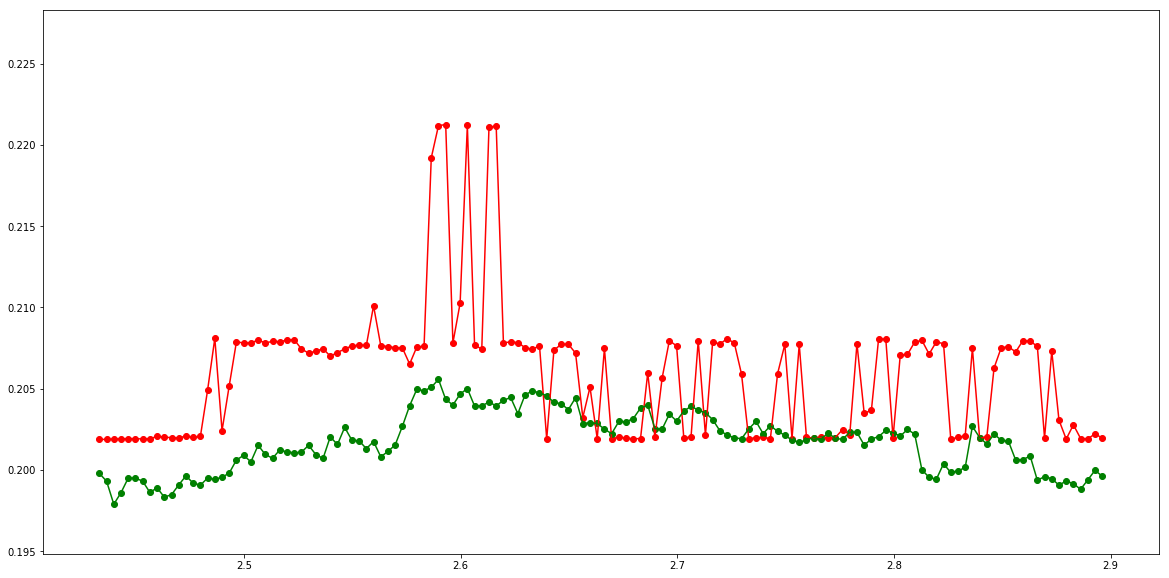

In [141]:
plt.figure(figsize=(20,10))
# visualizer.plot()
# for color in ['blue', 'red']:
for color in ['red']:
    color_df = visualizer.date_pred_targ_dict.get(color, pd.DataFrame())
    plt.scatter(color_df.iloc[:,0], color_df.iloc[:, -2]*10, color=color)
    plt.plot(color_df.iloc[:,0], color_df.iloc[:, -2]*10, color=color)
    plt.scatter(color_df.iloc[:,0], color_df.iloc[:, -1]*10, color='g')
    plt.plot(color_df.iloc[:,0], color_df.iloc[:, -1]*10, color='g')
plt.show()

### BS10 maxLR==0.01 3lstms
Epoch: 85/100... Step: 8738... Loss: 0.000911... Val Loss: 0.000262
Validation loss decreased (0.000265 --> 0.000262).  Saving model ...

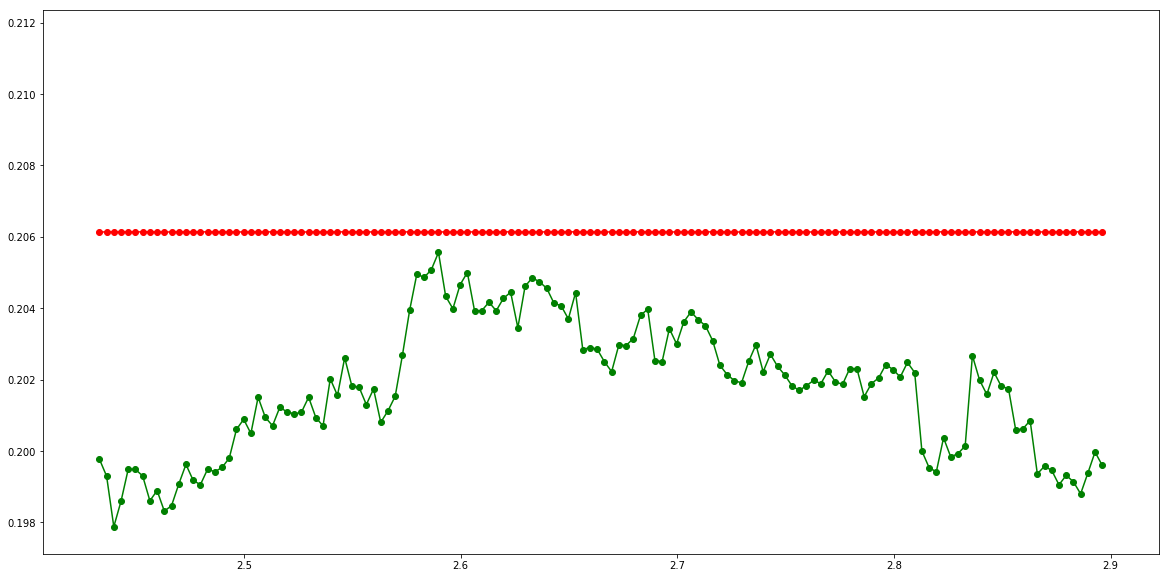

In [37]:
plt.figure(figsize=(20,10))
# visualizer.plot()
# for color in ['blue', 'red']:
for color in ['red']:
    color_df = visualizer.date_pred_targ_dict.get(color, pd.DataFrame())
    plt.scatter(color_df.iloc[:,0], color_df.iloc[:, -2]*10, color=color)
    plt.plot(color_df.iloc[:,0], color_df.iloc[:, -2]*10, color=color)
    plt.scatter(color_df.iloc[:,0], color_df.iloc[:, -1]*10, color='g')
    plt.plot(color_df.iloc[:,0], color_df.iloc[:, -1]*10, color='g')
plt.show()

### BS10 maxLR==0.01 2lstms

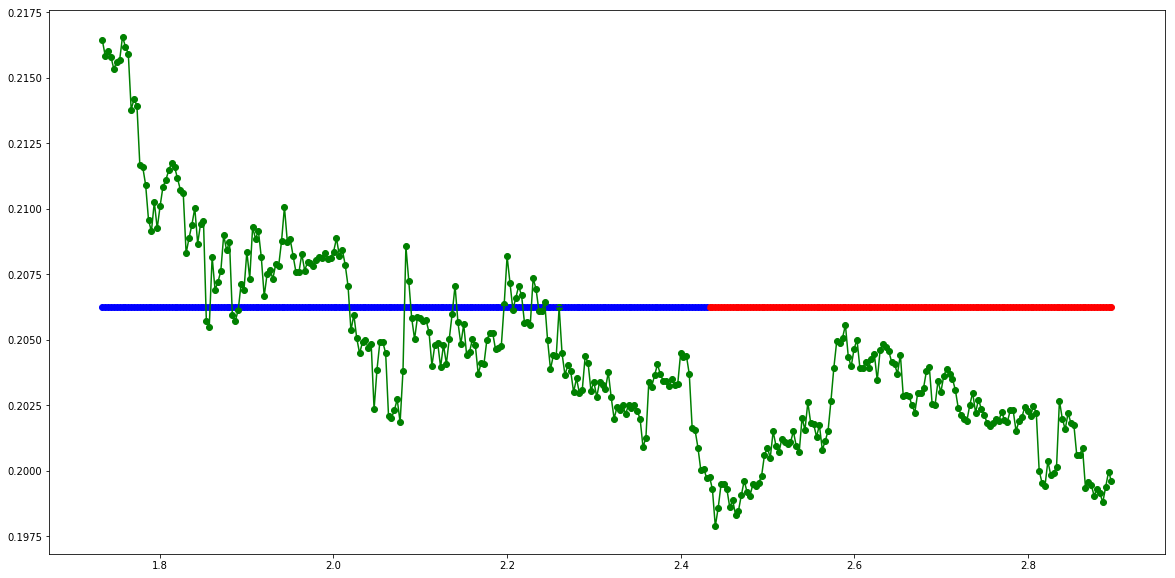

In [38]:
plt.figure(figsize=(20,10))
# visualizer.plot()
for color in ['blue', 'red']:
# for color in ['red']:
    color_df = visualizer.date_pred_targ_dict.get(color, pd.DataFrame())
    plt.scatter(color_df.iloc[:,0], color_df.iloc[:, -2]*10, color=color)
    plt.plot(color_df.iloc[:,0], color_df.iloc[:, -2]*10, color=color)
    plt.scatter(color_df.iloc[:,0], color_df.iloc[:, -1]*10, color='g')
    plt.plot(color_df.iloc[:,0], color_df.iloc[:, -1]*10, color='g')
plt.show()

### BS10 maxLR==0.001 2lstms

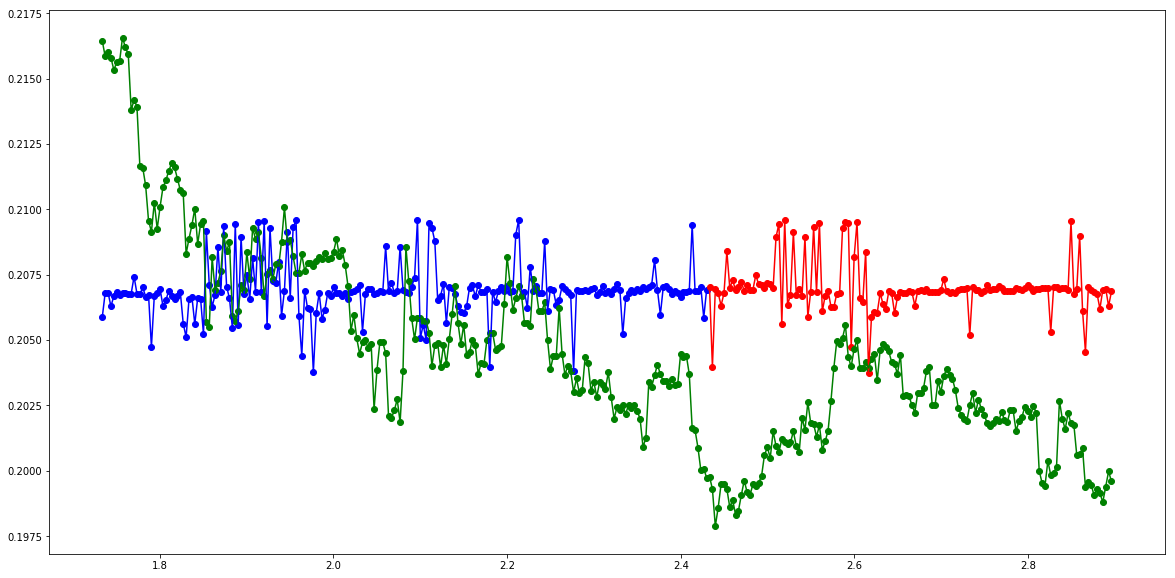

In [37]:
plt.figure(figsize=(20,10))
# visualizer.plot()
for color in ['blue', 'red']:
# for color in ['red']:
    color_df = visualizer.date_pred_targ_dict.get(color, pd.DataFrame())
    plt.scatter(color_df.iloc[:,0], color_df.iloc[:, -2]*10, color=color)
    plt.plot(color_df.iloc[:,0], color_df.iloc[:, -2]*10, color=color)
    plt.scatter(color_df.iloc[:,0], color_df.iloc[:, -1]*10, color='g')
    plt.plot(color_df.iloc[:,0], color_df.iloc[:, -1]*10, color='g')
plt.show()

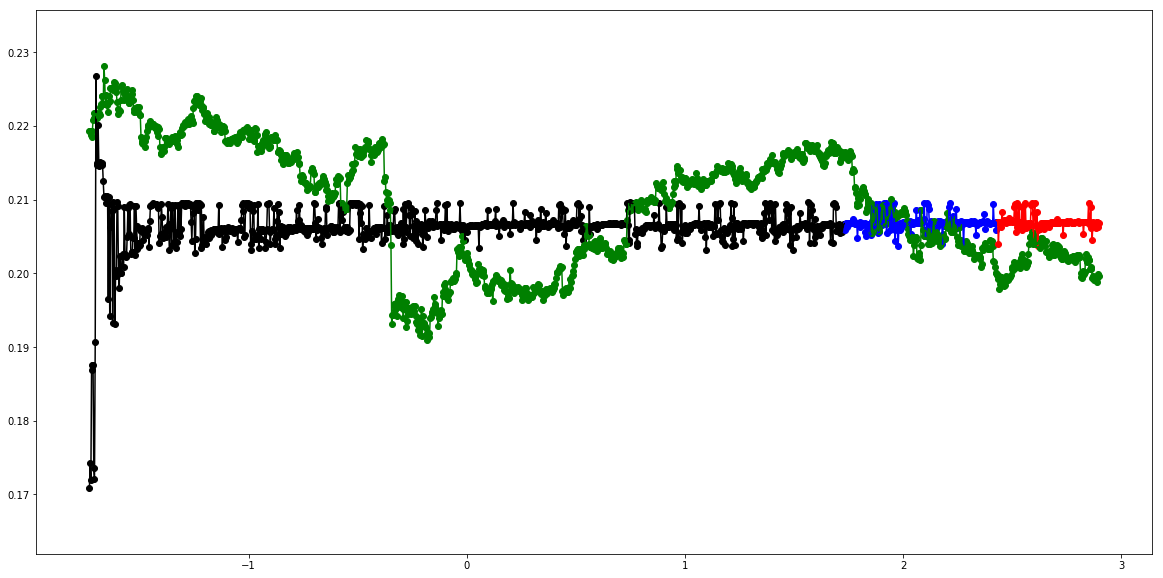

In [40]:
plt.figure(figsize=(20,10))
# visualizer.plot()
for color in ['black', 'blue', 'red']:
# for color in ['red']:
    color_df = visualizer.date_pred_targ_dict.get(color, pd.DataFrame())
    plt.scatter(color_df.iloc[:,0], color_df.iloc[:, -2]*10, color=color)
    plt.plot(color_df.iloc[:,0], color_df.iloc[:, -2]*10, color=color)
    plt.scatter(color_df.iloc[:,0], color_df.iloc[:, -1]*10, color='g')
    plt.plot(color_df.iloc[:,0], color_df.iloc[:, -1]*10, color='g')
plt.show()

Hyperparameters:

- model:
    - embedding_dim=features*2   ✓
    - hidden_dim=features*16  ✓
- learning rate  
- batch size (window size?)
- DONE - DID IMPROVE criterion = nn.MSELoss()   ✓
    - try a loss which scales through time. ✓
- optimizer = torch.optim.Adam(model.parameters(), lr=lr)
- add polynomial features ✓